-----


# Indraja Bandla
---

## Project : Analysed and visualised by Web scraping the job sites. 
Web scraping job postings to determine the industry factors that are most important in predicting the salary amounts and to determine the factors that distinguish job categories and titles from each other 

### All code is run in Python 2*

For web scraping please see **web_scraping** in repo folder.

Scraped web data provided in **job_posts.csv**

Answers to Part 1, Part 2 and Bonus

**Python 2 was used in this project due to unresolved issues with BeautifulSoup package compatibility with Python3 kernel in Jupyter Notebook.*

-----

### Business Case

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

Determine the industry factors that are most important in predicting the salary amounts for these data.
Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?
To limit the scope your principal has suggested that you focus on data-related job postings, e.g. data scientist, data analyst, research scientist, business intelligence, etc. You may also want to decrease the scope by selecting a single region.

Aggregators like Indeed.com regularly pool job postings from a variety of markets and industries. You will be scraping data from Indeed.com or other job aggregators to answer these two questions.

### Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator.

Once you have collected and cleaned the data, you will use it to answer the two questions outlined above.

### Part 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds such as the median salary.

You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. Communication of your process is key.

Note that most listings *DO NOT* come with salary information. Being to able extrapolate or predict the expected salaries for other listings is exactly why this model will be so valuable.

**Steps for Part 1:**

1. Collect data from [Indeed.com](www.indeed.com) (or another aggregator) on data-related jobs to use in predicting salary trends for your analysis.
  - Select and parse data from at least 1000 postings for jobs, potentially from multiple location searches.
2. Find out what factors most directly impact salaries (Title, location, department, etc.).
  - Test, validate, and describe your models. What factors predict salary category? How do your models perform?
3. Discover which features have the greatest importance when determining a low vs. high paying job.
  - Your Boss is interested in what overall features hold the greatest significance.
  - HR is interested in which SKILLS and KEY WORDS hold the greatest significance.   
4. Author a report to your Principal detailing your analysis.


### Part 2: Factors that distinguish job category

Using the job postings you scraped for part 1, or potentially new job postings from a second round of scraping, identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering you do, and what your target variables are.

The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.


**BONUS PROBLEM:**

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.

Note that this requires framing the salary problem as a classification problem detecting low vs. high salary positions.

---

## Requirements

- Scrape and prepare your data using BeautifulSoup.

- **Create and compare at least two models for each section.**. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing: Ridge, logistic regression, KNN, SVM, etc.
- A Jupyter Notebook with your analysis for a peer audience of data scientists. Make sure to clearly describe and label each section.
- A written report directed to your (non-technical!) Principal

 **Pro Tip:** You can find a good example report [here](https://www.dlsweb.rmit.edu.au/lsu/content/2_assessmenttasks/assess_tuts/reports_ll/report.pdf).

 **Pro Tip 2:** Scraping is one of the most fun, useful and interesting skills out there!  Don’t lose out by copying someone else.

___

## -- Part 01 - Salary Investigation --

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords # Import the stop word list
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

%matplotlib inline

## Data Cleaning, Feature Engineering and EDA

### 1. Read in scraped data:

In [2]:
# Import webscraped job data from https://www.seek.com.au

job_data = pd.read_csv("/Users/Indraja/Documents/Dsi/job_posts.csv")

In [3]:
job_data.head()

,keyword,pagenum,title,region,locality,salary,worktype,company,industry,body1,body2,url
0,Data-Science,1,Data Engineer/Scientist/Analytics Consultant,"CBD, Inner West & Eastern Suburbs",Sydney,Competitive and negotiable,Full Time,BI & DW Australia -,Information & Communication Technology,[],['Experience with Hadoop & Spark and related c...,https://www.seek.com.au/job/33394134?type=stan...
1,Data-Science,1,Senior Manager - Data Science,"CBD, Inner West & Eastern Suburbs",Sydney,"$150 - $180,000 package",Full Time,Finite IT Recruitment Solutions -,Information & Communication Technology,"['I am currently looking for a ', 'Senior Mana...",['You will possess a strong background in: Sta...,https://www.seek.com.au/job/33390778?type=stan...
2,Data-Science,1,Head of Data Science - ML & AI,"CBD, Inner West & Eastern Suburbs",Sydney,NaN,Full Time,Ethos BeathChapman -,Information & Communication Technology,"['We are looking for a Head of Data Science, M...","['Strong experience in analytical tools, proce...",https://www.seek.com.au/job/33349090?type=stan...
3,Data-Science,1,Head of Data Science & Analytics | Strategic r...,"CBD, Inner West & Eastern Suburbs",Sydney,Excellent Salary Package on offer,Full Time,Data Talent Pty Ltd -,Information & Communication Technology,[],['A unique Career opportunity along with an ex...,https://www.seek.com.au/job/33338994?type=stan...
4,Data-Science,1,Head of Data Science &amp; Products,"CBD, Inner West & Eastern Suburbs",Sydney,NaN,Full Time,TABCORP -,Science & Technology,"['Our Company', 'Tabcorp is one of the few int...","['Provide leadership, mentoring and developmen...",https://www.seek.com.au/job/33329262?type=stan...


In [4]:
# remove any duplicate job records from the list

job_data.drop_duplicates(['title','company','locality','region','industry','salary'])
job_data.shape

(2831, 12)

In [5]:
# Print nulls in the dataframe

print (job_data.isnull().sum().sort_values(ascending=False))

salary      1808
region       356
industry       1
worktype       1
locality       1
url            0
body2          0
body1          0
company        0
title          0
pagenum        0
keyword        0
dtype: int64


### *Location Columns Preparation:*
Mapping locations to a variable and converting to dummies

In [6]:
# check all location that exist in the job list

job_data['locality'].value_counts()

Sydney       1679
Melbourne     851
Brisbane      300
Name: locality, dtype: int64

In [7]:
# Create dictionary for locations - '1_' indicates a location. 
# This will be a useful identifier when creating dummy columns.

location_dict = {'Sydney':"1_syd",'Melbourne':"1_mel", 'Brisbane':"1_bri"}

# Create field with mapped location dictionary

job_data['loc_val'] = job_data['locality'].map(location_dict)

# fill with '1_other' as a regional indicator

job_data['loc_val'] = job_data['loc_val'].fillna("1_other")



In [8]:
# Create dummies for locations

loc_val_dummies = pd.get_dummies(job_data['loc_val'])

# Join the dummy variables to the main dataframe

job_data = pd.concat([job_data, loc_val_dummies], axis=1)

# Drop MiscFeature column and one of the MiscFeature categories ('other'):

job_data = job_data.drop('1_other', 1)
job_data.head(2)

,keyword,pagenum,title,region,locality,salary,worktype,company,industry,body1,body2,url,loc_val,1_bri,1_mel,1_syd
0,Data-Science,1,Data Engineer/Scientist/Analytics Consultant,"CBD, Inner West & Eastern Suburbs",Sydney,Competitive and negotiable,Full Time,BI & DW Australia -,Information & Communication Technology,[],['Experience with Hadoop & Spark and related c...,https://www.seek.com.au/job/33394134?type=stan...,1_syd,0,0,1
1,Data-Science,1,Senior Manager - Data Science,"CBD, Inner West & Eastern Suburbs",Sydney,"$150 - $180,000 package",Full Time,Finite IT Recruitment Solutions -,Information & Communication Technology,"['I am currently looking for a ', 'Senior Mana...",['You will possess a strong background in: Sta...,https://www.seek.com.au/job/33390778?type=stan...,1_syd,0,0,1


# work type columns preparation

Mapping worktype values to a variable and converting to dummies


In [9]:
job_data['worktype'].value_counts()

Full Time          1682
Contract/Temp      1135
Part Time            11
Casual/Vacation       2
Name: worktype, dtype: int64

In [10]:
# Create dictionary for worktype - '0_' indicates a worktype. 
# This will be a useful identifier when creating dummy columns.

work_dict = {'Full Time':"0_fulltime",'Contract/Temp':"0_contract","Part Time":"0_parttime", 'Casual/Vacation':"0_casual"}

# Create field with mapped location dictionary

job_data['work_val'] = job_data['worktype'].map(work_dict)




In [11]:
# Create dummies for worktype

work_val_dummies = pd.get_dummies(job_data['work_val'])

# Join the dummy variables to the main dataframe

job_data = pd.concat([job_data, work_val_dummies], axis=1)


job_data.head(2)

,keyword,pagenum,title,region,locality,salary,worktype,company,industry,body1,...,url,loc_val,1_bri,1_mel,1_syd,work_val,0_casual,0_contract,0_fulltime,0_parttime
0,Data-Science,1,Data Engineer/Scientist/Analytics Consultant,"CBD, Inner West & Eastern Suburbs",Sydney,Competitive and negotiable,Full Time,BI & DW Australia -,Information & Communication Technology,[],...,https://www.seek.com.au/job/33394134?type=stan...,1_syd,0,0,1,0_fulltime,0,0,1,0
1,Data-Science,1,Senior Manager - Data Science,"CBD, Inner West & Eastern Suburbs",Sydney,"$150 - $180,000 package",Full Time,Finite IT Recruitment Solutions -,Information & Communication Technology,"['I am currently looking for a ', 'Senior Mana...",...,https://www.seek.com.au/job/33390778?type=stan...,1_syd,0,0,1,0_fulltime,0,0,1,0



### *Industry Columns Preparation:*
Mapping industry values to a variable and converting to dummies

In [12]:

job_data['industry'].value_counts()

Information & Communication Technology    1987
Accounting                                 205
Banking & Financial Services               130
Consulting & Strategy                       85
Science & Technology                        65
Government & Defence                        63
Marketing & Communications                  53
Sales                                       50
Education & Training                        28
Insurance & Superannuation                  22
Human Resources & Recruitment               20
Healthcare & Medical                        19
Manufacturing, Transport & Logistics        15
Mining, Resources & Energy                  14
Administration & Office Support             14
Legal                                       11
Engineering                                  9
Call Centre & Customer Service               8
Advertising, Arts & Media                    6
Design & Architecture                        6
Real Estate & Property                       5
CEO & General

In [13]:
# Create dictionary for industry - '2_' indicates an industry.
# This will be a useful identifier when creating dummy columns.

industry_dict = {'Information & Communication Technology':'2_ICT'
                 ,'Accounting':'2_accounting'
                 ,'Banking & Financial Services':'2_BFS'
                 ,'Consulting & Strategy':'2_ConsStrat'
                 ,'Science & Technology':'2_SciTech'
                 ,'Marketing & Communications':'2_MarkComms'
                 ,'Government & Defence':'2_Gov'
                 ,'Insurance & Superannuation':'2_InsurSuper'
                 ,'Education & Training':'2_Education'
                 ,'Sales':'2_Sales'
                 ,'Healthcare & Medical':'2_health'
                 ,'Manufacturing, Transport & Logistics':'2_manufacturing'
                 ,'Administration & Office Support':'2_admin'
                 ,'Human Resources & Recruitment':'2_HR'
                 ,'Engineering':'2_engineering','Mining, Resources & Energy':'2_miningEnergy'
                 ,'Real Estate & Property':'2_property'
                 ,'Call Centre & Customer Service':'2_customerS'
                 ,'Retail & Consumer Products':'2_retail'
                 ,'Advertising, Arts & Media':'2_media'
                 ,'Design & Architecture':'2_architecture'
                 ,'Community Services & Development':'2_csd'
                 ,'Legal':'2_legal'
                 ,'Construction':'2_construct'
                 ,'CEO & General Management':'2_management'}


# Create field with mapped industry dictionary

job_data['industry_val'] = job_data['industry'].map(industry_dict)

# Place 'other' for no industry records

job_data['industry_val'] =job_data['industry_val'].fillna('2_other')

job_data.head(2)

,keyword,pagenum,title,region,locality,salary,worktype,company,industry,body1,...,loc_val,1_bri,1_mel,1_syd,work_val,0_casual,0_contract,0_fulltime,0_parttime,industry_val
0,Data-Science,1,Data Engineer/Scientist/Analytics Consultant,"CBD, Inner West & Eastern Suburbs",Sydney,Competitive and negotiable,Full Time,BI & DW Australia -,Information & Communication Technology,[],...,1_syd,0,0,1,0_fulltime,0,0,1,0,2_ICT
1,Data-Science,1,Senior Manager - Data Science,"CBD, Inner West & Eastern Suburbs",Sydney,"$150 - $180,000 package",Full Time,Finite IT Recruitment Solutions -,Information & Communication Technology,"['I am currently looking for a ', 'Senior Mana...",...,1_syd,0,0,1,0_fulltime,0,0,1,0,2_ICT


In [14]:
# Create dummies for industries

industry_val_dummies = pd.get_dummies(job_data['industry_val'])

# Join the dummy variables to the main dataframe:

job_data = pd.concat([job_data, industry_val_dummies], axis=1)

# Drop MiscFeature column and one of the MiscFeature categories ('other'):

job_data = job_data.drop('2_other', 1)
job_data.head(2)

,keyword,pagenum,title,region,locality,salary,worktype,company,industry,body1,...,2_customerS,2_engineering,2_health,2_legal,2_management,2_manufacturing,2_media,2_miningEnergy,2_property,2_retail
0,Data-Science,1,Data Engineer/Scientist/Analytics Consultant,"CBD, Inner West & Eastern Suburbs",Sydney,Competitive and negotiable,Full Time,BI & DW Australia -,Information & Communication Technology,[],...,0,0,0,0,0,0,0,0,0,0
1,Data-Science,1,Senior Manager - Data Science,"CBD, Inner West & Eastern Suburbs",Sydney,"$150 - $180,000 package",Full Time,Finite IT Recruitment Solutions -,Information & Communication Technology,"['I am currently looking for a ', 'Senior Mana...",...,0,0,0,0,0,0,0,0,0,0


### *Job Type Column Preparation:*
Create new variable of job type from 'title' and convert to dummies

In [15]:
job_data['title'].head(10) # Diverse range 

0         Data Engineer/Scientist/Analytics Consultant
1                        Senior Manager - Data Science
2                       Head of Data Science - ML & AI
3    Head of Data Science & Analytics | Strategic r...
4                  Head of Data Science &amp; Products
5                  Head of Data Science &amp; Products
6                  Head of Data Science &amp; Products
7    Head of Data Science - Unique Career Opportuni...
8    Computational Statistician | Data Science and ...
9    Junior Data Scientist (Modelling, Insights & D...
Name: title, dtype: object

In [16]:
# Create job title variable with default value of 'other':
job_data["title_val"] = '3_other'

# convert to lowercase and clean nulls:
job_data["title"] = job_data['title'].str.lower()
job_data["title"] = job_data["title"].fillna('NA')

# map job type string in title using (contains) and place "3_" and job in 'titleval' column
job_data.ix[job_data["title"].str.contains('data scientist', na=False),"title_val"] = '3_ds'
job_data.ix[job_data["title"].str.contains('data analyst', na=False),"title_val"] = '3_da'
job_data.ix[job_data["title"].str.contains('research analyst', na=False),"title_val"] = '3_ra'
job_data.ix[job_data["title"].str.contains('business analyst', na=False),"title_val"] = '3_ba'
job_data.ix[job_data["title"].str.contains('business intelligence', na=False),"title_val"] = '3_bi'

job_data[['title','title_val']].head(4)

,title,title_val
0,data engineer/scientist/analytics consultant,3_other
1,senior manager - data science,3_other
2,head of data science - ml & ai,3_other
3,head of data science & analytics | strategic r...,3_other


In [17]:
# Create dummies for titles

title_val_dummies = pd.get_dummies(job_data['title_val'])

# Join the dummy variables to the main dataframe:

job_data = pd.concat([job_data, title_val_dummies], axis=1)

# Drop MiscFeature column and one of the MiscFeature categories ('other'):

job_data = job_data.drop('3_other', 1)
job_data.head(2)

,keyword,pagenum,title,region,locality,salary,worktype,company,industry,body1,...,2_media,2_miningEnergy,2_property,2_retail,title_val,3_ba,3_bi,3_da,3_ds,3_ra
0,Data-Science,1,data engineer/scientist/analytics consultant,"CBD, Inner West & Eastern Suburbs",Sydney,Competitive and negotiable,Full Time,BI & DW Australia -,Information & Communication Technology,[],...,0,0,0,0,3_other,0,0,0,0,0
1,Data-Science,1,senior manager - data science,"CBD, Inner West & Eastern Suburbs",Sydney,"$150 - $180,000 package",Full Time,Finite IT Recruitment Solutions -,Information & Communication Technology,"['I am currently looking for a ', 'Senior Mana...",...,0,0,0,0,3_other,0,0,0,0,0


### *Job Seniority (Job Level) Column Preparation:*
Create new variable of seniority (i.e. job level) from 'title' and convert to dummies

In [18]:
# Create variable with default value of 'other':
job_data["seniority_val"] = '4_other'

job_data["title"] = job_data['title'].str.lower()
''
# map job type string in title using (contains) and place "3_" and job in 'titleval' column
job_data.ix[job_data["title"].str.contains('junior'),"seniority_val"] = '4_junior'
job_data.ix[job_data["title"].str.contains('senior'),"seniority_val"] = '4_senior'
job_data.ix[job_data["title"].str.contains('manager'),"seniority_val"] = '4_manager'
job_data.ix[job_data["title"].str.contains('specialist'),"seniority_val"] = '4_spec'

In [19]:
# Create dummies for seniority

senior_val_dummies = pd.get_dummies(job_data['seniority_val'])

# Join the dummy variables to the main dataframe:

job_data = pd.concat([job_data, senior_val_dummies], axis=1)

# Drop MiscFeature column and one of the MiscFeature categories ('other'):

job_data = job_data.drop('4_other', 1)
job_data.head(2)

,keyword,pagenum,title,region,locality,salary,worktype,company,industry,body1,...,3_ba,3_bi,3_da,3_ds,3_ra,seniority_val,4_junior,4_manager,4_senior,4_spec
0,Data-Science,1,data engineer/scientist/analytics consultant,"CBD, Inner West & Eastern Suburbs",Sydney,Competitive and negotiable,Full Time,BI & DW Australia -,Information & Communication Technology,[],...,0,0,0,0,0,4_other,0,0,0,0
1,Data-Science,1,senior manager - data science,"CBD, Inner West & Eastern Suburbs",Sydney,"$150 - $180,000 package",Full Time,Finite IT Recruitment Solutions -,Information & Communication Technology,"['I am currently looking for a ', 'Senior Mana...",...,0,0,0,0,0,4_manager,0,1,0,0


### Salary
Cleaning the salary column and converting it to numeric. Assumptions I have made are:
- All jobs will last a full year, so any salary information that is not in a year will be annualised. To do this i will create a temporary column which contains any mention of a salary term, then I will increase the amount by a multiplier to get the per-year salary amount.
- 'k' or 'K' indicates a wage in thousands.
- All jobs will pay the maximum indicated salaries. Whilst in reality this may not be true, I use this assumption as employers are obviously willing to pay up to this amount for talented individuals.

In [20]:
# Targeted cleaning of salary information to make parsing easier:

job_data["salary"] = job_data["salary"].str.replace("p.a", "year")
job_data["salary"] = job_data["salary"].str.replace("p.d", "day")
job_data["salary"] = job_data["salary"].str.replace("p.h", "hour")
job_data["salary"] = job_data["salary"].str.replace("p.m", "month")
job_data["salary"] = job_data["salary"].str.replace("\n", "")
job_data["salary"] = job_data["salary"].str.replace(",", "")
job_data["salary"] = job_data["salary"].str.replace("$", "")
job_data["salary"] = job_data["salary"].str.replace("/", "")
job_data["salary"] = job_data["salary"].str.replace("+", "")
job_data["salary"] = job_data["salary"].str.replace("k", "000")
job_data["salary"] = job_data["salary"].str.replace("K", "000")
job_data["salary"] = job_data["salary"].str.replace("to", "-")

job_data["salary"].head()

0             Competitive and negotiable
1                 150 - 180000 pac000age
2                                    NaN
3    Excellent Salary Pac000age on offer
4                                    NaN
Name: salary, dtype: object

In [21]:
# Create empty salary period column

job_data["salary_period"] = np.nan

# If the salary contains information on time period, save that time period string in the 'salary_period' column.
# Idea of creating a payment freuqency column sourced from Michael Salmon on medium.com blog

job_data["salary"] = job_data["salary"].fillna('NA')
job_data.ix[job_data["salary"].str.contains("year"),"salary_period"] = "year"
job_data.ix[job_data["salary"].str.contains("month"),"salary_period"] = "month"
job_data.ix[job_data["salary"].str.contains("week"),"salary_period"] = "week"
job_data.ix[job_data["salary"].str.contains("day"),"salary_period"] = "day"
job_data.ix[job_data["salary"].str.contains("hour"),"salary_period"] = "hour"
job_data.head(2)

,keyword,pagenum,title,region,locality,salary,worktype,company,industry,body1,...,3_bi,3_da,3_ds,3_ra,seniority_val,4_junior,4_manager,4_senior,4_spec,salary_period
0,Data-Science,1,data engineer/scientist/analytics consultant,"CBD, Inner West & Eastern Suburbs",Sydney,Competitive and negotiable,Full Time,BI & DW Australia -,Information & Communication Technology,[],...,0,0,0,0,4_other,0,0,0,0,NaN
1,Data-Science,1,senior manager - data science,"CBD, Inner West & Eastern Suburbs",Sydney,150 - 180000 pac000age,Full Time,Finite IT Recruitment Solutions -,Information & Communication Technology,"['I am currently looking for a ', 'Senior Mana...",...,0,0,0,0,4_manager,0,1,0,0,NaN


In [22]:
# Find all numeric features for each row in the salary column and place in a list

job_data["salary_range"] = [re.findall('\d+', s) for s in job_data["salary"]]
job_data["salary_range"][0:6]

0                    []
1    [150, 180000, 000]
2                    []
3                 [000]
4                    []
5                    []
Name: salary_range, dtype: object

In [23]:
# Take the maximum of any value in the list of salary lists: (assumption that candidates are paid the full amount)

salary_max = []
for salary in job_data["salary_range"]:
    if len(salary) > 0:
        salary_max.append(float(max(salary)))
    else:
        salary_max.append(1) # 1 is appended where no salary exists to ensure the annualisation calculation is performed for all rows. Later, all salaries below a certain amount are excluded
        
print len(salary_max)

2831


In [24]:
# Create a series of salary max

salary_max_df = pd.Series(salary_max,name='salary_max')

print salary_max_df.head()

# Join the salary_max column to the original dataframe

job_data = job_data.join(salary_max_df)
job_data.head(2)

0         1.0
1    180000.0
2         1.0
3         0.0
4         1.0
Name: salary_max, dtype: float64


,keyword,pagenum,title,region,locality,salary,worktype,company,industry,body1,...,3_ds,3_ra,seniority_val,4_junior,4_manager,4_senior,4_spec,salary_period,salary_range,salary_max
0,Data-Science,1,data engineer/scientist/analytics consultant,"CBD, Inner West & Eastern Suburbs",Sydney,Competitive and negotiable,Full Time,BI & DW Australia -,Information & Communication Technology,[],...,0,0,4_other,0,0,0,0,NaN,[],1.0
1,Data-Science,1,senior manager - data science,"CBD, Inner West & Eastern Suburbs",Sydney,150 - 180000 pac000age,Full Time,Finite IT Recruitment Solutions -,Information & Communication Technology,"['I am currently looking for a ', 'Senior Mana...",...,0,0,4_manager,0,1,0,0,NaN,"[150, 180000, 000]",180000.0


In [25]:
# Annualise wages: f
# Firstly, we create a multiplier column based on the salary period

job_data["salary_multiplier"] = 1

job_data["salary_period"] = job_data["salary_period"].fillna('1.0')
job_data.ix[job_data["salary_period"].str.contains("year"),"salary_multiplier"] = 1.0
job_data.ix[job_data["salary_period"].str.contains("month"),"salary_multiplier"] = 12.0 # months to years
job_data.ix[job_data["salary_period"].str.contains("week"),"salary_multiplier"] = 48.0 # 48 working weeks
job_data.ix[job_data["salary_period"].str.contains("day"),"salary_multiplier"] = 249.0 # 249 working days pa
job_data.ix[job_data["salary_period"].str.contains("hour"),"salary_multiplier"] = 1992.0 # Avg. of 1992 working days pa.

In [26]:
# Calculate final wage: maximum salary multiplied by the period

job_data['salary_max'] = job_data["salary_max"].fillna('1')
job_data['salary_final'] = job_data['salary_max'] * job_data['salary_multiplier']
job_data.head(2)

,keyword,pagenum,title,region,locality,salary,worktype,company,industry,body1,...,seniority_val,4_junior,4_manager,4_senior,4_spec,salary_period,salary_range,salary_max,salary_multiplier,salary_final
0,Data-Science,1,data engineer/scientist/analytics consultant,"CBD, Inner West & Eastern Suburbs",Sydney,Competitive and negotiable,Full Time,BI & DW Australia -,Information & Communication Technology,[],...,4_other,0,0,0,0,1.0,[],1.0,1.0,1.0
1,Data-Science,1,senior manager - data science,"CBD, Inner West & Eastern Suburbs",Sydney,150 - 180000 pac000age,Full Time,Finite IT Recruitment Solutions -,Information & Communication Technology,"['I am currently looking for a ', 'Senior Mana...",...,4_manager,0,1,0,0,1.0,"[150, 180000, 000]",180000.0,1.0,180000.0


In [104]:
job_data.to_csv('/Users/Indraja/desktop/sal_job_data.csv')

### Cleaning Body Text
In this section I will parse the job description field (body1) and analyse the key job skills and words.
Process:
1. Clean text using a function to remove characters and stopwords
- Vectorise the text to get a frequency of word dataframe (i.e.: dummy variables for words)
- Filter the text using a list of pre-compiled data job skill list
- Add the data back into the original dataframe

In [27]:
# Function taken from my Capstone Part-02 - cleaning text data.

def clean_text(body):

    # Remove links
    link_remove = re.sub(r"http\S+", "", str(body))
    
    # Remove non-letters
    letters = re.sub("[^a-zA-Z]", " ", link_remove) 
    
    # Convert to lower case, split into individual words
    words = letters.lower().split()                             
    
    # Convert the stop words to a set (increases search speed)
    stops = set(stopwords.words("english"))                  
    
    # Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # Join the words back into one string separated by space and return the result.
    return (" ".join(meaningful_words))

In [28]:
import nltk

In [29]:
#nltk.download()

In [30]:
nltk.download('all',halt_on_error=False)

[nltk_data] Downloading collection u'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/indraja/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/indraja/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/indraja/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/indraja/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/indraja/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/indraja/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[n

True

In [31]:
# Parse all descriptions and place in a new list

clean_body_text = []

for row in job_data['body1']:
    clean_body_text.append(clean_text(row))

clean_body_text[0]

''

In [32]:
# add cleaned text to dataframe

job_data['body_clean'] = clean_body_text
job_data.head(2)

,keyword,pagenum,title,region,locality,salary,worktype,company,industry,body1,...,4_junior,4_manager,4_senior,4_spec,salary_period,salary_range,salary_max,salary_multiplier,salary_final,body_clean
0,Data-Science,1,data engineer/scientist/analytics consultant,"CBD, Inner West & Eastern Suburbs",Sydney,Competitive and negotiable,Full Time,BI & DW Australia -,Information & Communication Technology,[],...,0,0,0,0,1.0,[],1.0,1.0,1.0,
1,Data-Science,1,senior manager - data science,"CBD, Inner West & Eastern Suburbs",Sydney,150 - 180000 pac000age,Full Time,Finite IT Recruitment Solutions -,Information & Communication Technology,"['I am currently looking for a ', 'Senior Mana...",...,0,1,0,0,1.0,"[150, 180000, 000]",180000.0,1.0,180000.0,currently looking senior manager data science ...


In [33]:
# Creating a vectorised dataframe of words from the job description column

from sklearn.feature_extraction.text import CountVectorizer

print ("Creating words...\n")

# Initialize the "CountVectorizer" - only top 10000 words kept
vectorizer = CountVectorizer(analyzer = "word",tokenizer = None,preprocessor = None,stop_words = None,max_features = 10000) 

# fit_transform() with our cleaned body text
train_data_features = vectorizer.fit_transform(clean_body_text)

# Fit cvec and convert the result to a DataFrame
words_df = pd.DataFrame(vectorizer.transform(clean_body_text).todense(), columns=vectorizer.get_feature_names())

print (words_df.shape)

# Fill any stray nulls
words_df.fillna(0)

words_df.head()

Creating words...

(2831, 9395)


,ab,aba,abadilla,abas,abby,abc,abigail,abilities,ability,abilty,...,youtube,yrs,zcrouch,zealand,zero,zhengzhou,zoe,zookeeper,zsoftech,zsofttech
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Create a list of data job skills sourced from multiple sources (and my own opinion!)

skills = ['r','r.','c++', 'python', 'java', 'ruby', 'javascript', 'data',
        'matlab', 'scala', 'excel', 'tableau', 'd3.js', 'sas','html','d3',
        'hadoop', 'mapreduce','spark', 'pig', 'hive', 'shark','stats',
        'zookeeper', 'flume', 'sql', 'nosql',
        'mongodb', 'aws', 'unstructured', 'structured',
        'structured', 'curiosity','communication','munging',
        'learning', 'calculus', 'algebra', 'statistics', 'visualization',
        'engineering', 'maths', 'design',
        'development', 'administration', 'management','research',
        'data mining', 'modeling', 'predictive',
        'b.i.', 'business intelligence', 'optimization', 'mining','science'
        'cloud', 'viz ', 'statistics',
        'analysis', 'n.l.p', 'nlp',
        'simulation', 'simulations', 'classification', 'clustering','regression',
        'entrepreneurial', 'entrepreneur', 'team','systems','IT',
        'wrangling', 'storyteller', 'storytelling', 'hacking',
        'deep', 'network', 'neural', 'sci-kit',
        'pandas', 'numpy', 'bi', 'knime', 'octave', 'rapidminer', 'xlstat', '@risk',
        'probability', 'dato', 'ggplot', 'ggvis', 'word', 'powerpoint', 'studio','management','analyst',
        'presentation','writing']

# Filter the columns of the vectorised dataframe for those that exist in our data skills list

word_list = words_df.columns

filter_list = [x for x in word_list if x in skills]
filter_list

# Note this list is used to manually filter the full vectoriser dataframe
# This allow a series of key-skills dummy columns to be placed into the final dataframe in the next cell.

[u'administration',
 u'analysis',
 u'analyst',
 u'aws',
 u'bi',
 u'classification',
 u'communication',
 u'curiosity',
 u'data',
 u'deep',
 u'design',
 u'development',
 u'engineering',
 u'entrepreneurial',
 u'excel',
 u'flume',
 u'hadoop',
 u'hive',
 u'html',
 u'java',
 u'javascript',
 u'learning',
 u'management',
 u'mapreduce',
 u'maths',
 u'matlab',
 u'mining',
 u'modeling',
 u'mongodb',
 u'network',
 u'nosql',
 u'optimization',
 u'pig',
 u'powerpoint',
 u'predictive',
 u'presentation',
 u'probability',
 u'python',
 u'rapidminer',
 u'regression',
 u'research',
 u'ruby',
 u'sas',
 u'scala',
 u'spark',
 u'sql',
 u'statistics',
 u'stats',
 u'storytelling',
 u'structured',
 u'studio',
 u'systems',
 u'tableau',
 u'team',
 u'unstructured',
 u'visualization',
 u'word',
 u'wrangling',
 u'writing',
 u'zookeeper']

In [35]:
# Create a final data job skills dataframe and concatenate with the original dataframe

skills_df = words_df[['python', 'java', 'ruby', 'javascript', 'data',
        'matlab', 'scala', 'excel', 'tableau', 'sas','html',
        'hadoop', 'mapreduce','spark', 'pig', 'hive', 'stats',
        'zookeeper', 'flume', 'sql', 'nosql',
        'mongodb', 'aws', 'unstructured',
        'structured', 'curiosity','communication',
        'learning', 'visualization',
        'engineering', 'maths', 'design',
        'development', 'administration', 'management','research',
        'modeling', 'predictive',
        'intelligence', 'optimization', 'mining','science',
        'cloud', 'statistics',
        'analysis',
         'classification', 'regression',
        'entrepreneurial',  'team','systems',
        'wrangling',
        'deep', 'network', 
        'bi', 'rapidminer',
        'word', 'powerpoint', 'studio','ms',
        'presentation','writing',
        'bachelors','bachelor','masters','phd']]

print (skills_df.shape)

# Concatenate into the final dataframe 'job_data_final'

job_data_final = pd.concat([job_data, skills_df], axis=1)
job_data_final.shape

(2831, 65)


(2831, 129)

In [36]:
job_data_final.isnull().sum().sort_values(ascending=False).head(10)

# All numerical column nulls have been removed
# Therefore there will be no value errors when creating our sub-dataframes for modelling

region           356
work_val           1
worktype           1
locality           1
industry           1
2_customerS        0
2_engineering      0
2_csd              0
2_health           0
3_bi               0
dtype: int64

# Other approach

In [37]:
#creating a better stopword library from a text file. and adding few of my own.

f = open(name='/Users/Indraja/Documents/Dsi/stopwords_en.txt',mode='r')

stp = set()
for l in f.readlines():
    l = l.replace('\n','')
    stp.add(l.lower())
morestop = {'project', 'support', 'work','years', 'experience', 'working','programming','team', 'business', 'customer', 'application','service', 
            'click', 'apply', 'com','au','skills', 'ability', 'high', 'level'}
stp.update(stp)
stp.update(morestop)

In [38]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

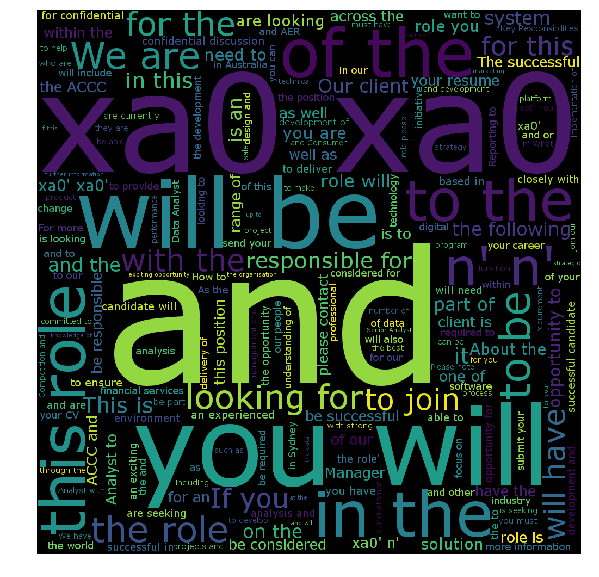

In [39]:

# Attempting to build a web cloud from the job_description column
text_cloud = ''.join(x for x in job_data.body1)

plt.figure(figsize=(10,10))
wordcloud = WordCloud(font_path='/Users/Indraja/downloads/verdana.ttf',
                      relative_scaling = 1.0,
                      stopwords = stp,
                      width=1000,
                      height=1000
                      ).generate(text_cloud)
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

---

### Final EDA:
Checking the salary and other variable distributions:

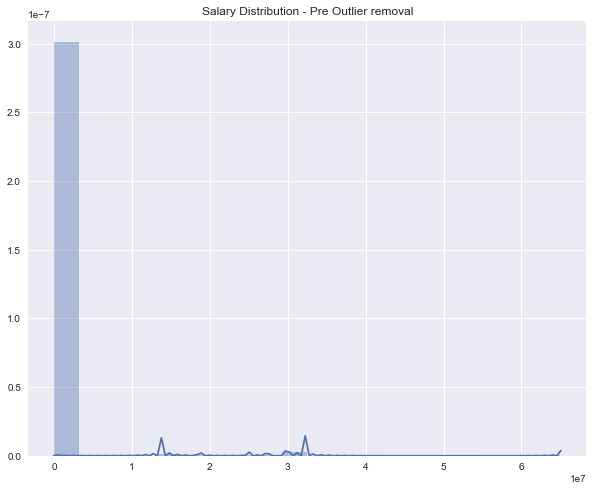

In [40]:
# Filter all jobs with salaries >1 and plot the distribution

job_data_final = job_data_final[job_data_final['salary_final'] > 1]

salary_values = job_data_final['salary_final'].values

fig = plt.figure(figsize=(10, 8))
sns.distplot(salary_values,bins=20)
plt.title("Salary Distribution - Pre Outlier removal")
plt.show()

# a major outlier exists at $6.5M!

739
350000.0


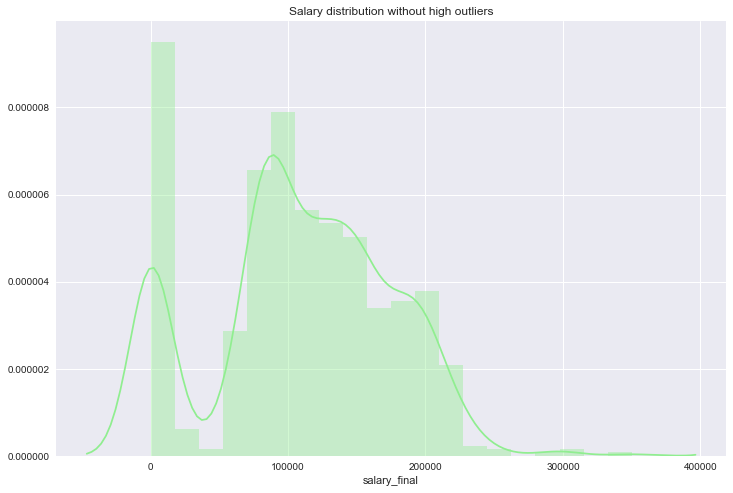

In [41]:
# Remove high outliers from the data

# Calculate mean and std
mean = np.mean(job_data_final['salary_final'], axis=0)
sd = np.std(job_data_final['salary_final'], axis=0)

# Create list of friends count values to keep:
final_list = [x for x in job_data_final.salary_final if (x < mean + 1.5 * sd)]

# Filter hail data by friends counts to keep:
job_data_final = job_data_final.ix[(job_data_final['salary_final'].isin(final_list))]

# Check length of new dataframe and new max friends count
print (len(job_data_final))
print (job_data_final['salary_final'].max())

# > 1000 outliers removed

fig = plt.figure(figsize=(12, 8))
sns.distplot(job_data_final['salary_final'],bins=20,color= 'lightgreen')
plt.title("Salary distribution without high outliers")

(618, 129)


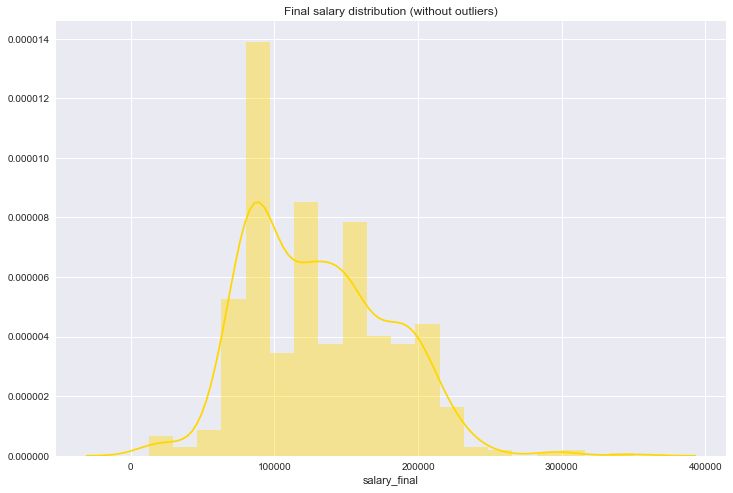

In [42]:
# There appears to be signficant peak at low wage. This could be from salaries per day/week that were missed.
# We will assume that all salaries <$10,000 are not true (i.e. annualised) so they will be removed.

job_data_final = job_data_final[job_data_final['salary_final'] > 10000]

print job_data_final.shape

fig = plt.figure(figsize=(12, 8))
sns.distplot(job_data_final['salary_final'], bins=20,color='gold')
plt.title("Final salary distribution (without outliers)")

### Job Info/Salary Distribution (Box) Plots

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

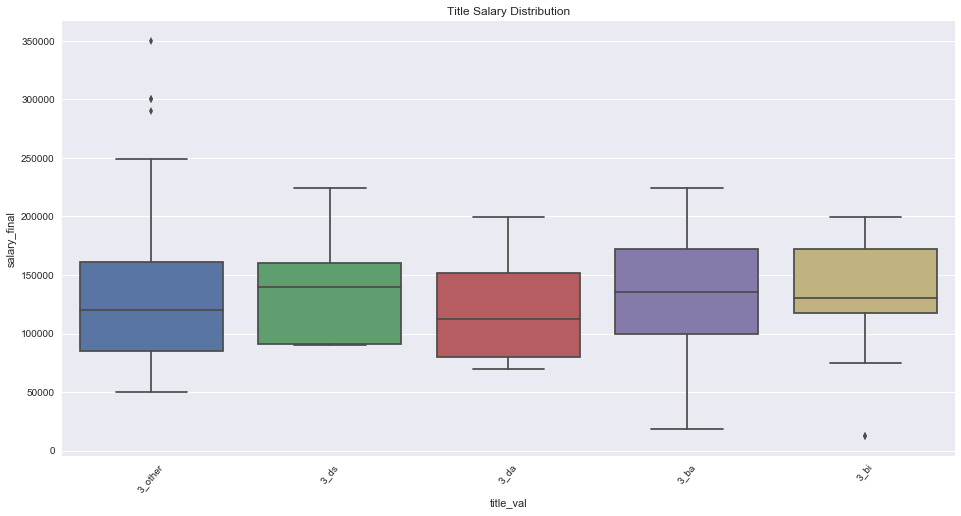

In [43]:
# Title vs Salary Distribution/Boxplot

fig = plt.figure(figsize=(16, 8))
sns.boxplot(x='title_val',y='salary_final',data=job_data_final,orient='v')
plt.title("Title Salary Distribution")
plt.xticks(rotation=50)

** Title Insight**: *Data Scientists have the highest median salary (hooray!) and a modest range. Business Analyst have the largest interquartile range and research analysts... have the lowest median salary.*

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

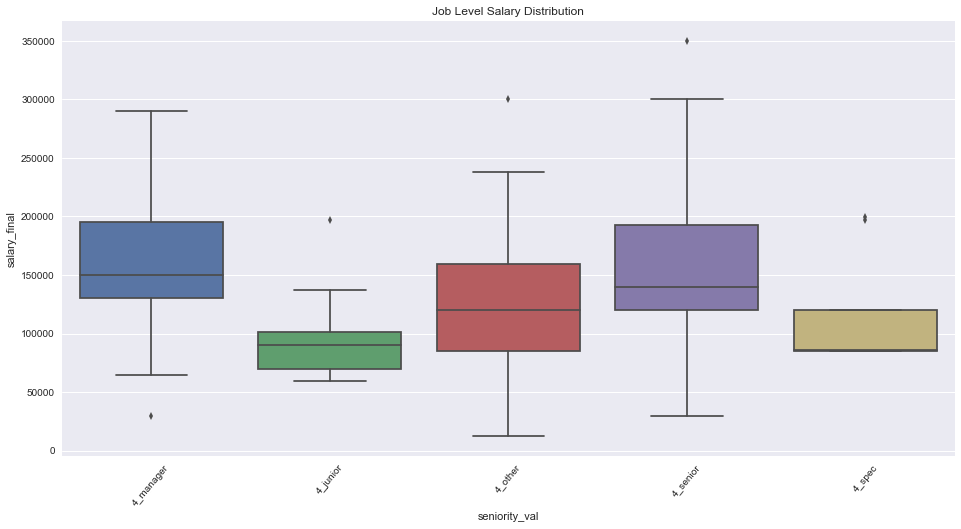

In [44]:
# Job Level vs Salary Distribution/Boxplots

fig = plt.figure(figsize=(16, 8))
sns.boxplot(x='seniority_val',y='salary_final',data=job_data_final,orient='v')
plt.title("Job Level Salary Distribution")
plt.xticks(rotation=50)

** Seniority Insight**: *Managers have the highest median salary, but Senior levels are less than $10,000 behind. Junior roles have both the lowest median and range of salaries.*

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

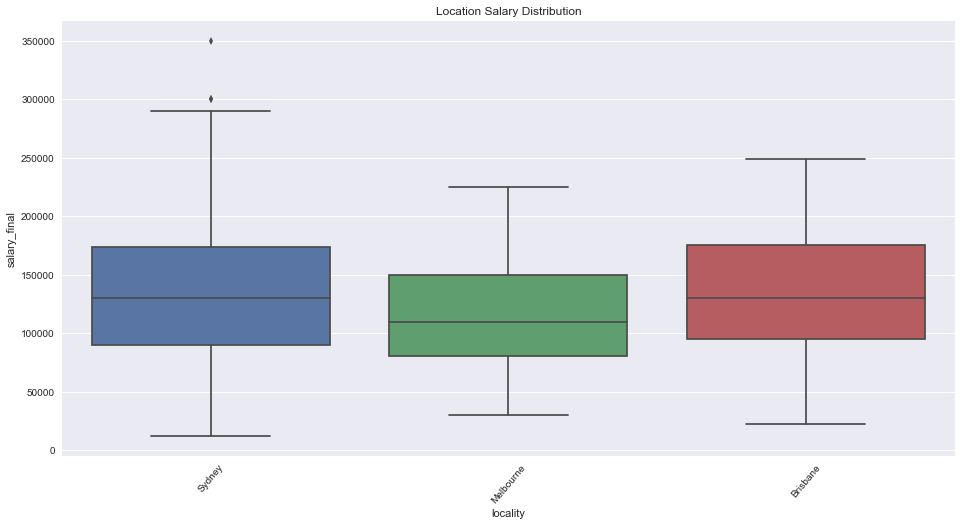

In [45]:
# Location vs Salary Distribution/Boxplots

fig = plt.figure(figsize=(16, 8))
sns.boxplot(x='locality',y='salary_final',data=job_data_final,orient='v')
plt.title("Location Salary Distribution")
plt.xticks(rotation=50)

** Location Insight**: *Sydney has the widest range in data job salaries, Brisbane has a slightly larger IQR. However the highest median salary location is in Canberra.*

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

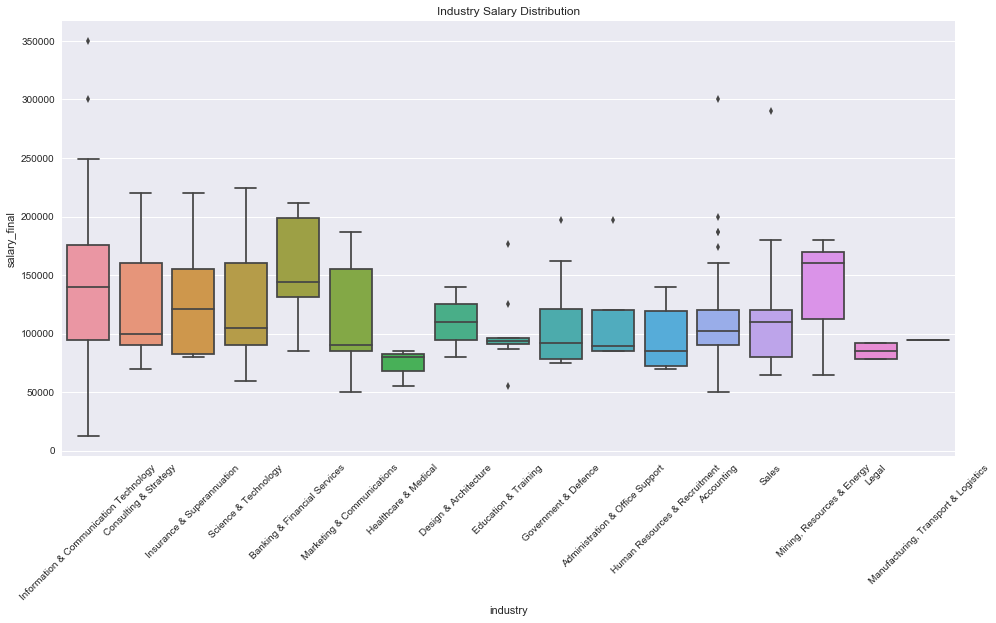

In [46]:
# Industry vs Salary Distributio/Boxplots

fig = plt.figure(figsize=(16, 8))
sns.boxplot(x='industry',y='salary_final',data=job_data_final,orient='v')
plt.title("Industry Salary Distribution")
plt.xticks(rotation=45)

**Industry Insight**: *'Insurance and Superannuation' has one of the greatest ranges in job salaries and the highest median salary of all industries. Overall 'Sales' has the highest IQR and salary, but the lowest median - could this indicate a small sample size for this industry..?

# Visual Analysis using Tableau

In [1]:
%%HTML
<div class='tableauPlaceholder' id='viz1497763242845' style='position: relative'><noscript><a href='#'><img alt='Visual Analysis of Job data ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;pr&#47;predictionsonwebscrapedjobs&#47;Story1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='predictionsonwebscrapedjobs&#47;Story1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;pr&#47;predictionsonwebscrapedjobs&#47;Story1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1497763242845');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1020px';vizElement.style.height='1033px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

---
## -- Salary Modelling --

Now our cleaned dataset is finalised we can investigate our brief further:

1. Determine the industry factors that are most important in predicting the salary amounts for these data.
- Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

To answer these briefs, two modelling exericses will be performed:
1. Investigation into the best model and overall features that predict salary: **location, industry, jobtype, seniority**
2. Investigation into the best model and overall features that predict salary for **key skills and words** in job descriptions

Firstly I will perform linear regression using all predictors using the salary variable as a target.

Depending on this outcome, I will then create a classifier target: High versus Low salary to reframe the question as:
- *Which features have the greatest importance when determining a low vs. high paying job?*

In [47]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

### - Investigating impact of "Overall Features" on Salary -

These features include:
    - Location
    - Industry
    - Role (data scientist, data analyst, etc.)
    - Seniority (manager,junior, etc.)

In [48]:
# Dataframe of all overall (dummy) variables - location, industry, role, seniortiy

X_overall = job_data_final[[ '1_bri','1_mel', '1_syd',
       '2_ConsStrat', '2_Education', '2_Gov', '2_HR', '2_ICT',
       '2_InsurSuper', '2_MarkComms', '2_Sales', '2_SciTech',
       '2_accounting', '2_admin', '2_architecture', '2_construct', '2_csd',
       '2_customerS', '2_engineering', '2_health', '2_legal',
       '2_management', '2_manufacturing', '2_media', '2_miningEnergy',
       '2_property', '2_retail', '3_ba', '3_bi', '3_da',
       '3_ds', '3_ra', '4_junior', '4_manager',
       '4_senior', '4_spec']]

In [49]:
# Standardise the X variables

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

Xs_overall = ss.fit_transform(X_overall)

### Linear (Lasso) Regression - *Overall Features*

Firstly I will perform a regression by using a Linear Model trained with Lasso penalty. This will enable us to perform a regression model on the continuous salary target variable and identify the features (aka. predictors) of greatest importance.

In [50]:
# Set y variable:

y = job_data_final['salary_final']

In [51]:
# Perform Lasso Linnear Regression

# Lassco CV and git with predictors and salary target
optimal_lasso = LassoCV(n_alphas=500, cv=5, verbose=1)
optimal_lasso.fit(Xs_overall, y)

lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xs_overall, y, cv=5)

# Display the individual scores of each CV sampling method, and the average
print lasso_scores
print np.mean(lasso_scores)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

[ 0.05651952  0.11491551 -0.02889166  0.15056006  0.07617736]
0.0738561560105


....................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished


In [52]:
# Validate the LassoCV and investigate the predictor coefficients

lasso.fit(Xs_overall, y)
print lasso.score(Xs_overall, y)

lasso_coefs = pd.DataFrame({'variable':X_overall.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(10)

0.173165713569


,abs_coef,coef,variable
33,9941.266810,9941.266810,4_manager
34,8078.950115,8078.950115,4_senior
7,5855.505470,5855.505470,2_ICT
1,4644.380156,-4644.380156,1_mel
12,3465.994115,-3465.994115,2_accounting
32,3217.953073,-3217.953073,4_junior
27,2552.368400,2552.368400,3_ba
30,2493.490606,2493.490606,3_ds
10,1931.419554,-1931.419554,2_Sales
20,1811.864552,-1811.864552,2_legal


#### Comment: 
The R^2 value is very low for this model so it doesn't appear that the overall variables can accurately predict the *actual* salary of the role well. That said, the variables with the greatest coefficients - managerial, senior roles and banking and ICT industries - do fall in line with general observations on well paid roles.

Instead, we will reframe the problem as a **classification**.

----

## Classification Modelling - *Overall Features*

I will now invetsigate the overall variables as a classification of salary.

To do this I will create a new variable of high vs. low salaries, assumed to be:
        1. High Salary > $100,000
    2. Low Salary <= $100,000
    
The first step is to create this target variable, then I will compare the accuracy scores of two models (Logisitc Regression and a Decision Tree Classifier) and review features within both to see which predictors are most important.

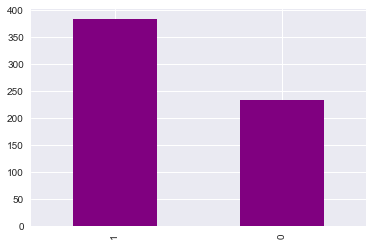

In [53]:
# Create a new Y target for high vs low:
job_data_final['salary_lvh'] = 0

# Set >100000 as "high-paying" job
job_data_final.loc[job_data_final.salary_final > 100000, 'salary_lvh'] = 1

job_data_final['salary_lvh'].value_counts().plot(kind='bar',color='purple') # More high paid jobs than lower paid jobs!

### Decision Tree Classification

In [54]:
# Reset y as new target (class) for our classification algorithm

y = job_data_final['salary_lvh']

In [55]:
# Perform a gridsearch to get the optimal hyperparameters for our decision tree model, based on ou X and Y variables

dtc_params = {
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

dtc = DecisionTreeClassifier()
dtc_gs = GridSearchCV(dtc, dtc_params, cv=5, verbose=1, refit=True)

# Fit the data to the gridsearch
dtc_gs.fit(Xs_overall, y)

Fitting 5 folds for each of 847 candidates, totalling 4235 fits


[Parallel(n_jobs=1)]: Done 4235 out of 4235 | elapsed:   21.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50], 'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [56]:
# Review the accuracy and parameters of our optimal model

dtc_best = dtc_gs.best_estimator_
print dtc_gs.best_params_
print dtc_gs.best_score_

{'max_features': 'sqrt', 'min_samples_split': 25, 'max_depth': 9}
0.68932038835


In [57]:
# Test our model with the hyperparameters from the gridsearch

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeClassifier(max_features=4,min_samples_split=2,max_depth=6)

dtr.fit(X_overall, y)

dtr_scores = cross_val_score(dtr, X_overall, y, cv=5)
print dtr_scores
print (sum(dtr_scores)/len(dtr_scores))

[ 0.7016129   0.65322581  0.70967742  0.61290323  0.60655738]
0.656795346378


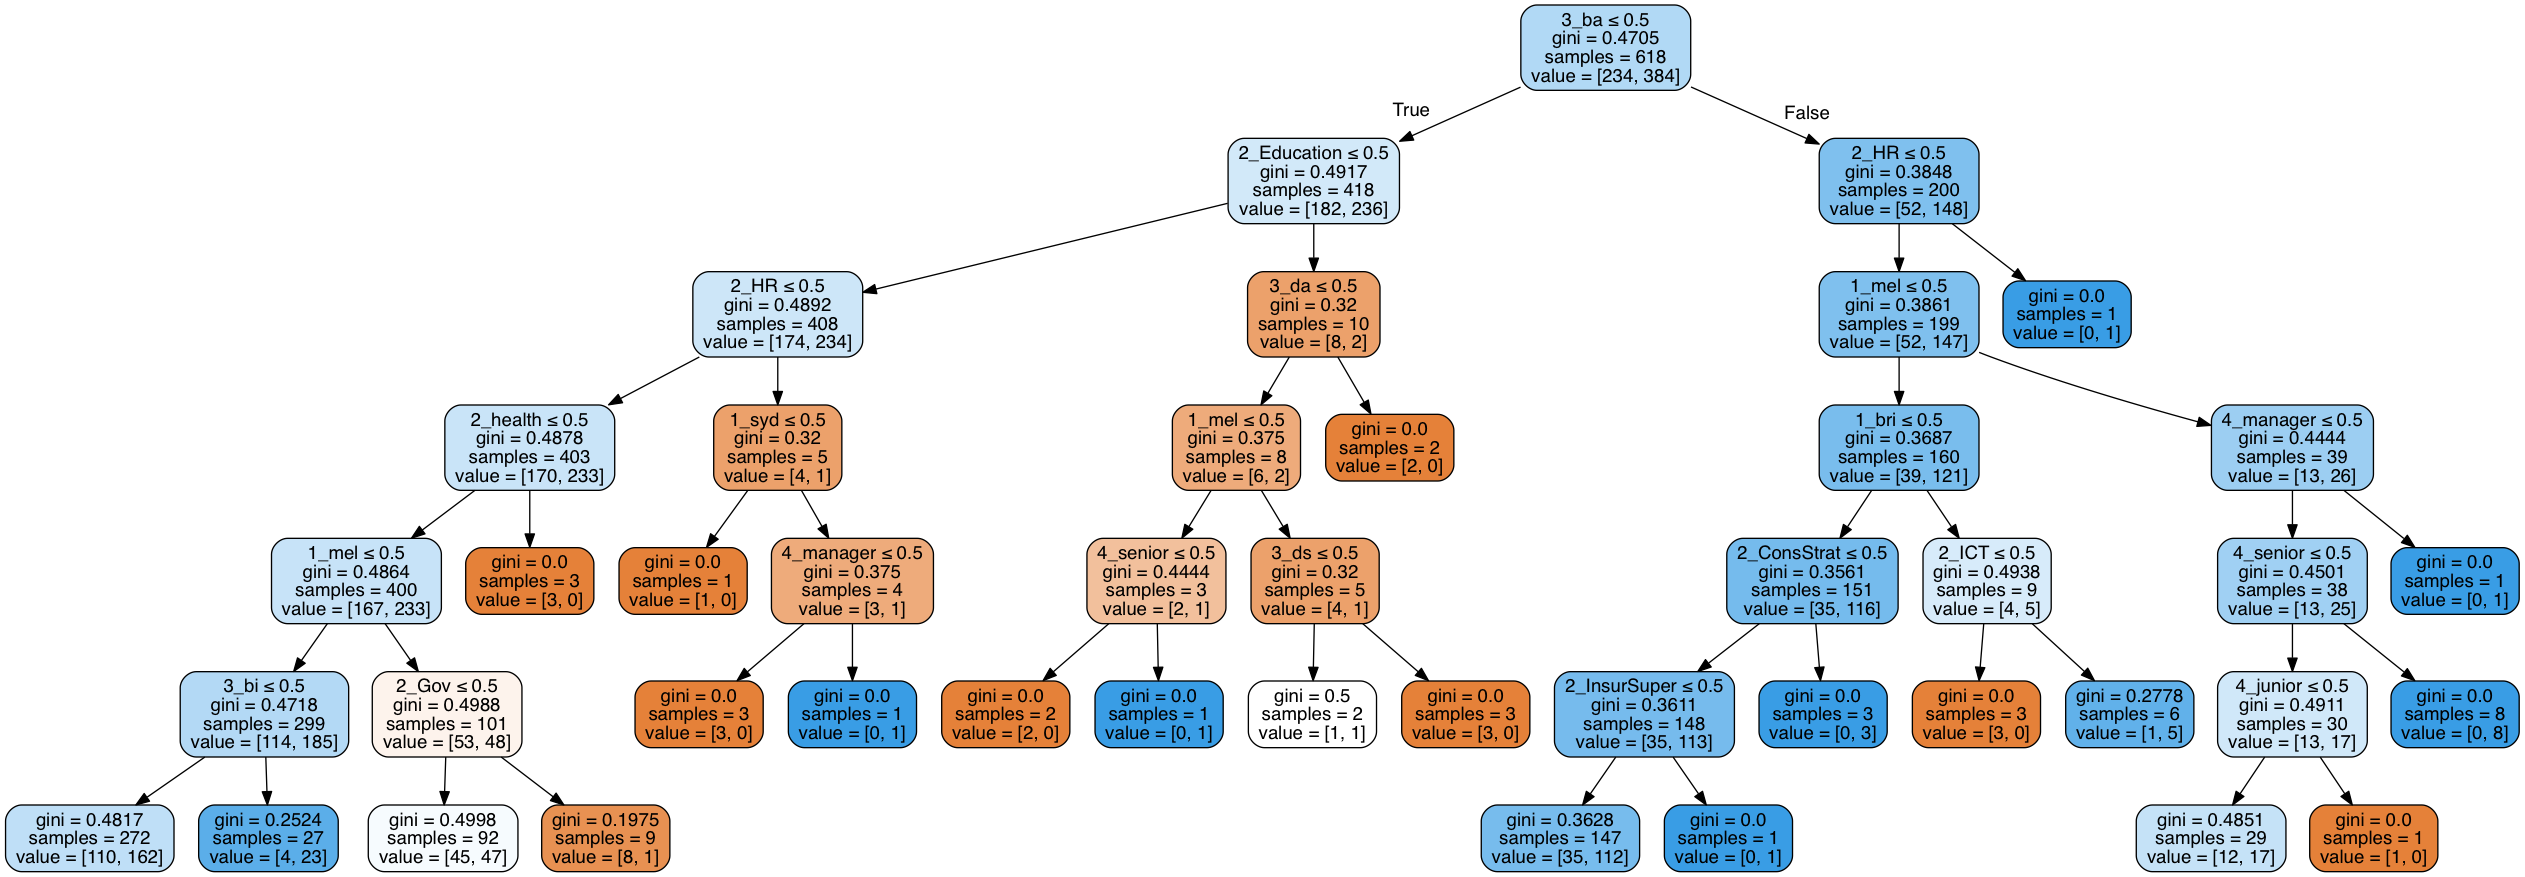

In [58]:
# Plot the final decision tree! - At time of plotting, classifier was set to:
# (max_features='sqrt',min_samples_split=4,max_depth=7)
# Notebook output may differ due to original gridsearch CV iterations

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# initialize the output file object
dot_data = StringIO() 

export_graphviz(dtr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_overall.columns)  


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [59]:
# Extract the top features

top_features = pd.DataFrame({
        'feature':X_overall.columns,
        'importance':dtc_best.feature_importances_})

top_features.sort_values('importance', ascending=False, inplace=True)
top_features.head(10)

,feature,importance
27,3_ba,0.172791
29,3_da,0.137836
33,4_manager,0.130263
7,2_ICT,0.103189
2,1_syd,0.099745
5,2_Gov,0.066182
12,2_accounting,0.058338
34,4_senior,0.045305
28,3_bi,0.039826
6,2_HR,0.028754


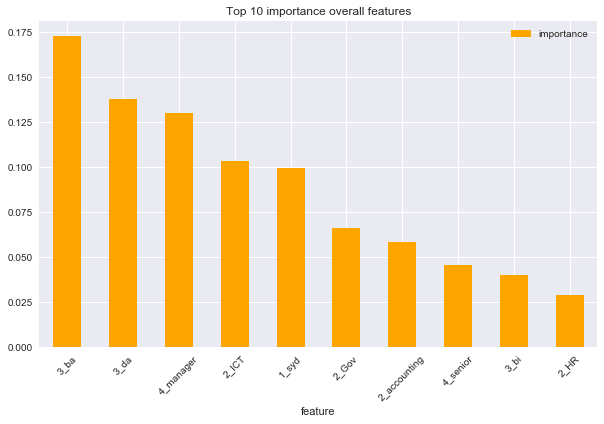

In [60]:
# Decision Tree feature importance plot

top_features.head(10).sort_values('importance',ascending=False).plot(kind='bar',
                                                                 x='feature',
                                                                 figsize=(10,6),
                                                                            rot=45,
                                                                 color='orange',
                                                                 title="Top 10 importance overall features")

#### Comment: 
The R^2 value is much improved compared to the regression model at **0.63**. This means that we can use the overall features to predict the high vs low jobs with greater accuracy than the specific salary amounts. The decision tree model suggests that of the modelled features, those of key importance are: ICT industry, data analyst/scientist roles, junior positions (!) in Sydney.

We will now invetsigate another classification model (linear regression) to see how its performance compares...

----

### Logistic Regression Classification

In [61]:
# Set parameters for gridsearching

gs_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.logspace(-5,0,100)
}

# pass gridsearching with logistic regression and parameters

lr_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=5, verbose=1)
print (lr_gridsearch)

lr_gridsearch.fit(Xs_overall, y)

# print optimal logreg scores and parameters
print lr_gridsearch.best_score_
print lr_gridsearch.best_params_

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-05,   1.12332e-05, ...,   8.90215e-01,   1.00000e+00]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
0.681229773463
{'penalty': 'l1', 'C': 0.061359072734131694, 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.9s finished


In [62]:
# export the R^2 scores and logreg coefficients

best_lr = lr_gridsearch.best_estimator_

print (best_lr.score(Xs_overall, y))

coef_df_overall = pd.DataFrame({
        'coefficient':np.abs(best_lr.coef_[0]),
        'feature':X_overall.columns})

coef_df_overall.sort('coefficient',ascending=False).head(10)

0.716828478964


/Users/indraja/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,coefficient,feature
7,0.385046,2_ICT
33,0.338568,4_manager
34,0.299631,4_senior
27,0.242541,3_ba
30,0.112699,3_ds
32,0.089799,4_junior
2,0.087076,1_syd
20,0.061607,2_legal
28,0.060838,3_bi
4,0.029302,2_Education


#### Comment:
The R^2 value of the optimised logistic (gridsearched) regression model is higher than the decision tree model at 0.71. The logistic regression model suggests that of the modelled features, those that influence the salary the most are: senior/managerial roles roles in data science in the Sydney.

Using output from the two classification models, and to the lesser extent the linear regression model, we can now draw some conclusions to which overall features impact salary the most (see report at end of part 1 coding).

## - Modelling of Job Skills and Key Words impact on Salary -

### Linear (Lasso) Regression

In [63]:
# Set up new dataframe for only the skills and key words predictors

X_skills = job_data_final[['python','java', 'ruby', 'javascript', 'data', 'matlab', 'scala',
       'excel', 'tableau', 'sas', 'html', 'hadoop', 'mapreduce',
       'spark', 'pig', 'hive', 'stats', 'zookeeper', 'flume', 'sql',
       'nosql', 'mongodb', 'aws', 'unstructured', 'structured',
       'structured', 'curiosity', 'communication', 'learning',
       'statistics', 'visualization', 'engineering', 'maths',
       'design', 'development', 'administration', 
       'research', 'modeling', 'predictive', 'intelligence',
       'optimization', 'mining', 'science', 'cloud', 'statistics',
       'analysis', 
       'classification','regression', 
        'team', 'systems', 'wrangling', 
       'deep', 'network',  'bi',
       'rapidminer', 'word', 'powerpoint', 'studio', 'management',
       'ms', 'presentation', 'writing', 'bachelors',
       'bachelor', u'masters', 'phd']]

Xs_skills = ss.fit_transform(X_skills)

In [64]:
# Perform Lasso Linnear Regression

# Lassco CV and git with predictors and salary target
optimal_lasso = LassoCV(n_alphas=500, cv=5, verbose=1)
optimal_lasso.fit(Xs_skills, y)

lasso_skills = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso_skills, Xs_skills, y, cv=5)

# Display the individual scores of each CV sampling method, and the average
print lasso_scores
print np.mean(lasso_scores)



........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

[-0.10395661  0.06004814 -0.25534374  0.04176957 -0.03154543]
-0.0578056151385


In [65]:

# Validate the LassoCV with a lasso fit and investigate the predictor coefficients

lasso_skills.fit(Xs_skills, y)

lasso_coefs_skills = pd.DataFrame({'variable':X_skills.columns,
                            'coef':lasso_skills.coef_,
                            'abs_coef':np.abs(lasso_skills.coef_)})

lasso_coefs_skills.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs_skills.head(10)

,abs_coef,coef,variable
39,0.056813,-0.056813,intelligence
36,0.054070,-0.054070,research
19,0.051251,0.051251,sql
31,0.035316,0.035316,engineering
55,0.033993,0.033993,word
48,0.030867,-0.030867,team
27,0.027075,-0.027075,communication
51,0.023477,-0.023477,deep
33,0.021390,0.021390,design
29,0.019785,-0.019785,statistics


**Comment:**

This model produces a very low R^2 (0.05) score meaning it does not accurately predict the salary.

Let us reframe this problem as a classification to see if it improves...

----

## Classification Modelling - *Skills and Key Words*

### Decision Tree Classification

In [66]:
dtc_params = {
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

dtc_skills = DecisionTreeClassifier()
dtc_skills_gs = GridSearchCV(dtc_skills, dtc_params, cv=5, verbose=1, refit=True)

dtc_skills_gs.fit(Xs_skills, y)

dtc_skills_best = dtc_skills_gs.best_estimator_
print dtc_skills_gs.best_params_
print dtc_skills_gs.best_score_

Fitting 5 folds for each of 847 candidates, totalling 4235 fits
{'max_features': 'sqrt', 'min_samples_split': 5, 'max_depth': 9}
0.681229773463


[Parallel(n_jobs=1)]: Done 4235 out of 4235 | elapsed:   29.9s finished


In [67]:
# Validate the gridsearch and R^2 
# Notebook output may differ due to original gridsearch CV iterations

dtr_skills = DecisionTreeClassifier(max_features='log2',min_samples_split=20,max_depth=None)

dtr_skills.fit(Xs_skills, y)

dtr_skills_scores = cross_val_score(dtr_skills, Xs_skills, y, cv=5)
print dtr_skills_scores
print (sum(dtr_skills_scores)/len(dtr_skills_scores))

[ 0.66935484  0.68548387  0.66129032  0.66129032  0.6147541 ]
0.65843469064


In [68]:
# Extract the top features

top_features_skills = pd.DataFrame({
        'feature':X_skills.columns,
        'importance':dtc_skills_best.feature_importances_})

top_features_skills.sort_values('importance', ascending=False, inplace=True)
top_features_skills.head(10)

,feature,importance
39,intelligence,0.245210
4,data,0.204717
33,design,0.090103
53,bi,0.088875
48,team,0.063535
29,statistics,0.048987
49,systems,0.046019
28,learning,0.034880
26,curiosity,0.033066
37,modeling,0.030174


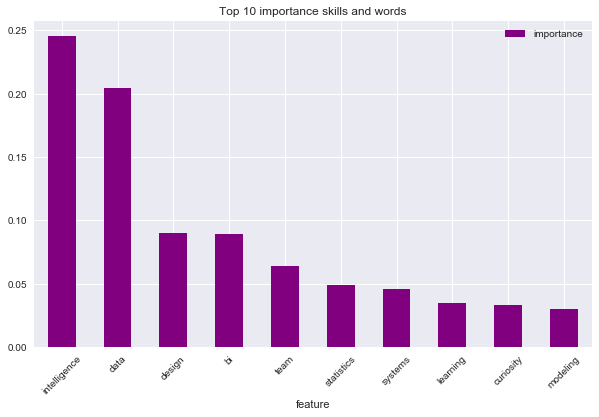

In [69]:
# Logistic Regression key coefficients

top_features_skills.head(10).sort_values('importance',ascending=False).plot(kind='bar',
                                                                 x='feature',
                                                                 figsize=(10,6),
                                                                            rot=45,
                                                                 color='purple',
                                                                 title="Top 10 importance skills and words")

#### Comment: 
Similarly to the overall features modelling... the R^2 value is much improved compared to the regression model at **0.68**. This means that we can use the skills features to predict the high vs low jobs with greater accuracy than the specific salary amounts. The decision tree model suggests that of the modelled features, those of key importance are research and development, and to a lesser extent SQL, science and enterpreneurial skills.

We will now invetsigate another classification model (logistic regression) to see how its performance compares...

----

### Logistic Regression - *Skills and Key Words*

In [70]:
# Logistic Regression Gridsearch

lr_gridsearch.fit(Xs_skills, y)

print lr_gridsearch.best_score_
print lr_gridsearch.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
0.673139158576
{'penalty': 'l2', 'C': 0.49770235643321137, 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    9.9s finished


In [71]:
# fit logistic regression model with optimised hyperparameters

logreg = LogisticRegression(penalty='l1',C=0.024201282647943811,solver='liblinear')
logreg.fit(Xs_skills, y)

print 'Logreg intercept:', logreg.intercept_
print 'Logreg coef(s):', logreg.coef_

Logreg intercept: [ 0.21887076]
Logreg coef(s): [[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -0.01351155  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]


In [72]:
# Create a table of the features and coefficients

best_lr_skills = lr_gridsearch.best_estimator_

print (best_lr_skills.score(Xs_skills, y))

coef_df_skills = pd.DataFrame({
        'coefficient':np.abs(best_lr_skills.coef_[0]),
        'feature':X_skills.columns})

coef_df_skills.sort('coefficient',ascending=False).head(5)

0.720064724919


/Users/indraja/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,coefficient,feature
36,1.011875,research
42,0.690167,science
19,0.567632,sql
39,0.505074,intelligence
63,0.499273,bachelor


### Comment:
The R^2 value of the optimised logistic (gridsearched) log.regression model is similar to the decision tree model at 0.65. However, the gridsearch suggests we use the lasso penalty parameter and, when doing so we are only left with one predictor - research! Not even python...

I will now discuss the results of web scraping, NLP and modelling in a report...

---

---

### *Part 1 Report: *

## *Investigation into which job attributes impact salary*

***Executive Summary***

The aim of this analysis was to investigate the key factors that influence salaries for jobs in data and research. A web scraping exercise was performed to gather 2,500 records of advertised jobs in *data and research*. Once all data was collected, the sample was reduced to approximately 619 viable records to conduct the analysis. The results indicate that the predictors do not peform well in multiple linear regression models, when attempting to predict the *actual* salary. However, when classification algorithms are run on high vs. low salary classes, the models have much higher accuracy. Key overall features which indicate higher salaries include senior and managerial positions in data science, particularly in Sydney and the Gold Coast. Banking and Finance and ICT also have high paying roles. Key skills include research and development, as well as SQL, science and entrepreneurial skills.

***Introduction***

This investigation set out to identify the key characteristics of jobs, in fields of data and research, that influence the salary. Firstly a web scraping exercise was performed that sourced **2904** data fields from https://seek.com.au. This was performed using BeautfifulSoup and Requests by accessing key components of the html code. The jobs searched were: 
- Data Science
- Data Analyst
- Business Analyst
- Research Analyst
- Research Scientist
The key information sourced form the scraping includes the job title, salary, location, industry, description and company rating (which ended up being null). Once enough data was collected it was cleaned prior to modelling.

***Data Cleaning and Exploratory Data Analysis:***

The job information dataset needed significant cleaning. This was performed by reading in the data from the scraped csv, into a in pandas dataframe. Some of the key processes included:
1. Creating dummy columns for industry, location and job title (extracting role name and level/seniority). Dummy column creation is critical to ensure this information can be used for modelling.
2. Cleaning the salary field: this was a lengthy process due to many characters and formats. An annualised version of available salary data was derived, with the assumption that candidates would get paid the maximum salary in any range (a very positive assumption!)
3. Extracting key skills from job descriptions: to do this, natural language processing was used, including CountVectorisation, to produce a dataframe of all recorded words (removing stop words). To reduce this further, a precompiled list of key data/research skills and requirements was used to filter the dataframe.
4. Salary outliers were removed to give more confidence in our target variable.

These processes resulted in a final dataset of 613 records; a significant reduction but an appropriate one. Of this sample, further exploration found some other interesting insights:
- **Data Scientists** have the highest median salary(!) and a moderate salary range. Business Analysts, close behind, also have the largest interquartile range and research analysts... have the lowest median salary.*
- Managers have the highest median salary, but Senior levels are less than $10,000 behind. Junior roles have both the lowest median and range of salaries.
- Sydney has the widest range in job salaries, however Brisbane has a slightly larger IQR. However the highest median salary location is in Canberra.*
- Insurance and Superannuation' has one of the largest ranges in job salaries and the highest median salary of all industries. Overall 'Sales' has the highest IQR but the lowest median, yet also the highest salary - could this indicate a small sample size for this industry?

***Regression and Classification Algorithms***

The ultimate goal of this analysis was to satisfy two key deliverables with respect to salary:
- Current Boss is interested in what overall features hold the greatest significance.
- HR is interested in which SKILLS and KEY WORDS hold the greatest significance.

Each deliverable had a separate sequence of machine learning algorithms tested against the salary target, which will now be discussed in the subsequent sections.

*Overall Features*

* Regression*: Firstly a multilinear regression model was developed with a lasso penalty to investigate whether the actual salary (i.e. the continuous salary variable) can be predicted accurately. The R^2 value was very low for this model so it doesn't seem the overall variables can accurately predict the actual salary of the role with confidence. That said, the variables with the greatest coefficients - managerial and senior roles in banking and ICT industries - do fall in line with general observations on well paid roles.

*Classification*: In order to improve the model performance the regression problem was reframed as a classification. A new variable of high vs. low salaries was created, with the assumption that high salaries are over $100,000. Two classificiation algorithms were then investigated; Logisitc Regression and a Decision Tree Classification. The R^2 values of both models were much improved on the regression model, both greater than 0.63 (LR was 0.74!). This means that we can use the overall features to predict the high vs low jobs with greater accuracy than the specific salary amounts.

Using output from the two classification models - the logistic coefficients and decision tree feature importance - we can now draw conclusions on which overall features impact salary the most:
- Location: Sydney and Gold Coast
- Industry: Banking, ICT and Education
- Job: Data Scientists and Data Analysts
- Seniority: Managerial and Senior levels

*Skills and Key Word Features*

*Regression:* Similarly to the overall feature investigation, when using actual salary in a linear regression model for the key skills and words in the job descriptions, the R^2 is very low at 0.04. No confident conclusions can therefore be drawn on predictive skills from this model.

*Classification:* Using the high versus low salary class, Logisitc Regression and Decision Tree Classification were performed on the key skills target predictors and both had significant improvements of R^2's greater than 0.6. The logistic regression model had a slightly better R^2 (0.66 to 0.62) however the optimised model employed a lasso penalisation (determined from gridsearching) which removed all coefficients apart from *research*.

Using output from the two classification models we can now draw conclusions on which skills and key words impact salary the most:
- Research (identified by both models)
- Development - assumed to be of development of models or personal development
- Entrepreneurial acumen
- Technicals skills in science (likely data!) and SQL.

*Conclusion:*

This analysis has identified the key features that impact salary for both overall features and the key required skills of a job description. However we have not found an algorithm that is highly accurate (i.e.: > 0.9) and these results must be accepted with this knowledge. In order to refine this analysis further, other algorithms should be investigated. Also, other accuracy analyses could be performed to assess which model results are more robust, and also a principle component analysis to investigate the predictors in greater depth.

----


----

---

---


## -- Part 02 - Additional Investigations --

Using the job postings you scraped for part 1, or potentially new job postings from a second round of scraping, identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

---
### Further Investigations:
### *'What makes a good data scientist?'* &  *'What skills do certain industries look for?'*

### Investigation 1: What skills and attributes of a job constitute a 'data scientist'?

In this analysis I will look at which locations, industries and key skills classify a **'data scientist'**. My hypothesis is that key technical skills such as python, sql, are more important at classifying a data scientist role than location and industry... To do this I will:
1. Create a dataframe of the three types of precitors and a new y target of a binary classifier (1: data scientist, 0: not data scientist) and all other job types removed.
2. Perform decision tree and logistic regression classifications and evaluate the model performance and features.

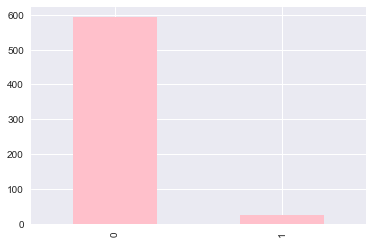

In [73]:
#Setup data scientist predictors

ds_predictors = job_data_final[[ '1_bri',
        '1_mel', 
        '1_syd',
       '2_ConsStrat', '2_Education', '2_Gov', '2_HR', '2_ICT',
       '2_InsurSuper', '2_MarkComms', '2_Sales', '2_SciTech',
       '2_accounting', '2_admin', '2_architecture', '2_construct', '2_csd',
       '2_customerS', '2_engineering','2_health', '2_legal',
       '2_management', '2_manufacturing', '2_media', '2_miningEnergy',
       '2_property', '2_retail',
       'python','java', 'ruby', 'javascript', 'data', 'matlab', 'scala',
       'excel', 'tableau', 'sas', 'html', 'hadoop', 'mapreduce',
       'spark', 'pig', 'hive', 'stats', 'zookeeper', 'flume', 'sql',
       'nosql', 'mongodb', 'aws', 'unstructured',
       'structured', 'curiosity', 'communication', 'learning',
       'statistics', 'visualization', 'engineering', 'maths',
       'design', 'development', 'administration',
       'research', 'modeling', 'predictive', 'intelligence',
       'optimization', 'mining', 'science', 'cloud',
       'analysis',
       'classification', 'regression', 
        'team', 'systems', 'wrangling',
       'deep', 'network',  'bi',
       'rapidminer', 'word', 'powerpoint', 'studio', 'management',
       'ms', 'presentation', 'writing', 'bachelors',
       'bachelor', 'masters', 'phd']]

Xs_ds_predictors = ss.fit_transform(ds_predictors)

# Set up data scientist target

y_ds = job_data_final['3_ds']

# Plot the counts of data science v.s other roles

y_ds.value_counts().plot(kind='bar',color='pink') 
# quite a low number of data science roles but it is not an 'insignificant' amount to not investigate...

### Decision Tree Classification - *Data Scientist*

In [74]:
# Decision Tree gridsearch to get the optimal decision tree model

dtc_params = {
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()
dtc_gs = GridSearchCV(dtc, dtc_params, cv=5, verbose=1, refit=True)

dtc_gs.fit(Xs_ds_predictors, y_ds)

dtc_best = dtc_gs.best_estimator_

print dtc_gs.best_params_
print dtc_gs.best_score_

Fitting 5 folds for each of 847 candidates, totalling 4235 fits
{'max_features': 'sqrt', 'min_samples_split': 4, 'max_depth': 7}
0.977346278317


[Parallel(n_jobs=1)]: Done 4235 out of 4235 | elapsed:   29.5s finished


In [75]:
# Validate Decision tree model and R^2
# Notebook output may differ due to original gridsearch CV iterations

dtr_ds = DecisionTreeClassifier(max_features=3,min_samples_split=2,max_depth=None)

dtr_ds.fit(Xs_ds_predictors, y_ds)

dtr_ds_scores = cross_val_score(dtr_ds, ds_predictors, y_ds, cv=5)

# Export scores of validated model

print dtr_ds_scores
print (sum(dtr_ds_scores)/len(dtr_ds_scores))

[ 0.95967742  0.96774194  0.97580645  0.99186992  0.98373984]
0.97576711251


In [76]:
# Extract the top features from the decision tree classifier.

top_features_DS = pd.DataFrame({
        'feature':ds_predictors.columns,
        'importance':dtr_ds.feature_importances_})

top_features_DS.sort_values('importance', ascending=False, inplace=True)
top_features_DS.head(10)

,feature,importance
11,2_SciTech,0.274855
31,data,0.115750
54,learning,0.098558
73,team,0.089640
74,systems,0.051140
9,2_MarkComms,0.048977
2,1_syd,0.040472
62,research,0.031130
7,2_ICT,0.030236
51,structured,0.029824


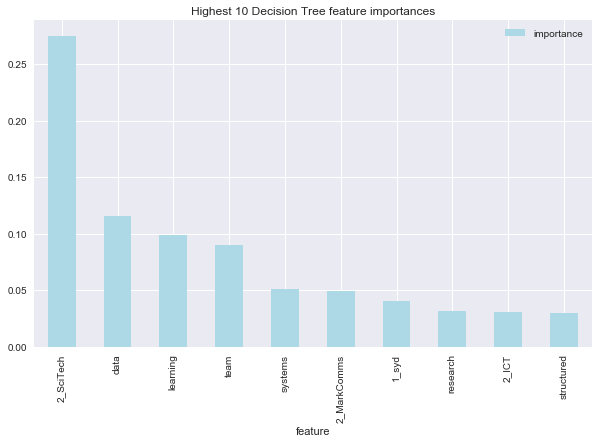

In [77]:
# Plot the top features

top_features_DS.head(10).sort_values('importance',ascending=False).plot(kind='bar',x='feature',figsize=(10,6),color='lightblue',title="Highest 10 Decision Tree feature importances")

#### Comment:

Very high accuracy with this model - R^2  of > 0.9. Key skills also in line with common data science roles python, mining, data and sas. The most important non-skill feature is a job in Melbourne.

---
### Logisitc Regression - *Data Scientist*

In [78]:
# Perform logreg gridsearch to find optimal model

lr_gridsearch.fit(Xs_ds_predictors, y_ds)

print lr_gridsearch.best_score_
print lr_gridsearch.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
0.96925566343
{'penalty': 'l1', 'C': 0.19630406500402725, 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    8.9s finished


In [79]:
# Validate logistic regression model and R^2

logreg = LogisticRegression(penalty='l1',C=0.048626015800653531,solver='liblinear')
logreg.fit(Xs_ds_predictors, y_ds) # uses penalty of 11, which is Lasso (knocks out )

best_lr_ds = lr_gridsearch.best_estimator_

print (best_lr_ds.score(Xs_ds_predictors, y_ds))

coef_df_DS = pd.DataFrame({
        'coefficient':np.abs(best_lr_ds.coef_[0]),
        'feature':ds_predictors.columns})

coef_df_DS.sort('coefficient',ascending=False).head(10)

0.980582524272


/Users/indraja/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,coefficient,feature
11,0.657474,2_SciTech
56,0.396942,visualization
3,0.364175,2_ConsStrat
89,0.297824,masters
9,0.274409,2_MarkComms
2,0.182188,1_syd
62,0.179647,research
54,0.113083,learning
83,0.092168,management
88,0.080317,bachelor


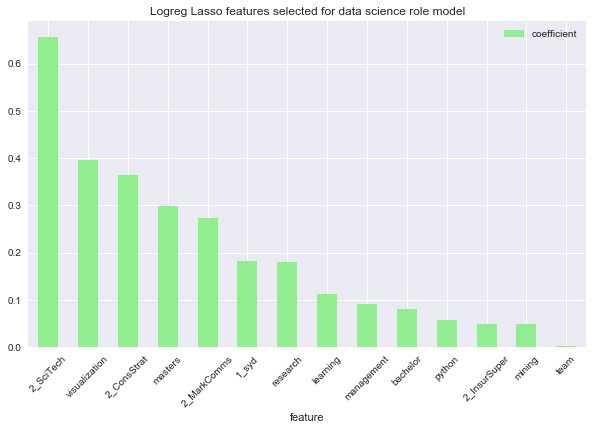

In [80]:
# Plot the remaining Lasso coefficients

coef_df_DS[coef_df_DS['coefficient'] != 0].sort_values('coefficient',ascending=False).plot(kind='bar',
                                                                                           x='feature',
                                                                                    figsize=(10,6),color='lightgreen',
                                                                                    rot=45,
                                                                                    title="Logreg Lasso features selected for data science role model")

#### Comment:

Another very high accuracy with this model - R^2  of > 0.95. Key skills also in line with common data science roles; python (on top!), learning, predictive (analytics) and data. The most important non-skill feature is a job in the Science and Tech. (Further discussion at the end of Part-02)

---
## Investigation 2: What skills and locations are most common in key industries?

In this analysis I will look at which locations and key skills classify data and research jobs in certain industries. My hypothesis is that key technical skills such as python, sql, will be more important at classifying a data scientist role than location... To do this I will:
1. Create a dataframe of the two types of precitors (location and skills/words) and a new y target of a multinomial classifier (different integers referring to different industries). Job types and seniority are not included in this analysis.
2. Perform logistic regression (multinomial) classification and a feature selection/knn analysis, then evaluate model performance and features. I have selected logistic rgression as it performed better than decision trees in the previous analysis, and I wanted to see the output generated with an alternative algorithm.

In [81]:
# Create a classification dictionary for the 'industry' variable:

industry_classifier = {'Information & Communication Technology':1,'Accounting':2, 'Banking & Financial Services':3,
                       'Consulting & Strategy':4 ,'Science & Technology':5,'Marketing & Communications':6,
                       'Government & Defence':7 ,'Insurance & Superannuation':8,'Education & Training':9,'Sales':10}

# Map the classifier dictionary to the industry variable and create the multinomial classification target
# I will only include the top-10 industries in this classification analysis

job_data_final['industry_class'] = job_data_final['industry'].map(industry_classifier)

# for all other variables I will set to a class of 0

job_data_final['industry_class'] = job_data_final['industry_class'].fillna(0)

# Check the industry mapping

print job_data_final[['industry','industry_class']].head(10)

                                  industry  industry_class
1   Information & Communication Technology             1.0
9                    Consulting & Strategy             4.0
12  Information & Communication Technology             1.0
14              Insurance & Superannuation             8.0
20                    Science & Technology             5.0
25            Banking & Financial Services             3.0
26              Insurance & Superannuation             8.0
30                    Science & Technology             5.0
33                    Science & Technology             5.0
42                    Science & Technology             5.0


In [82]:
# Create a dataframe of industry predictors (all location and key skill/word targets)

ind_predictors = job_data_final[[ '1_bri',
       '1_mel',  '1_syd',
       'python','java', 'ruby', 'javascript', 'data', 'matlab', 'scala',
       'excel', 'tableau', 'sas', 'html', 'hadoop', 'mapreduce',
       'spark', 'pig', 'hive', 'stats', 'zookeeper', 'flume', 'sql',
       'nosql', 'mongodb', 'aws', 'unstructured',
       'structured', 'curiosity', 'communication', 'learning',
       'statistics', 'visualization', 'engineering', 'maths',
       'design', 'development', 'administration', 'management',
       'research', 'modeling', 'predictive', 'intelligence',
       'optimization', 'mining', 'science', 'cloud',
       'analysis',
       'classification',  'regression', 
        'team', 'systems', 'wrangling', 
       'deep', 'network',  'bi',
       'rapidminer', 'word', 'powerpoint', 'studio', 'management',
       'ms', 'presentation', 'writing', 'bachelors',
       'bachelor', 'masters', 'phd']]

# Set industry class as target

y_ind = job_data_final['industry_class']

### Logistic Regression - *Industry*

In [83]:
# Perform gridsearch on logistic regression with industry variables/target

lr_gridsearch.fit(ind_predictors, y_ind)

print lr_gridsearch.best_score_
print lr_gridsearch.best_params_ # 

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
0.621359223301
{'penalty': 'l2', 'C': 0.021544346900318846, 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   10.9s finished


In [84]:
# Export the coefficients from the optimised logreg model

best_lr_skills = lr_gridsearch.best_estimator_

# Create a dataframe of the predictors and the logreg coefficients:

df_classi = pd.DataFrame(np.abs(best_lr_skills.coef_))
df_classi.columns = ind_predictors.columns
industry_class_name = ['Other','ICT','Accounting', 'Banking_FS',
                       'Consulting_Strategy' ,'Science_Technology','Marketing',
                       'Government' ,'Insurance','Education','Sales']
df_class_transpose = pd.DataFrame.transpose(df_classi)
df_class_transpose.columns = industry_class_name

df_class_transpose.head()

,Other,ICT,Accounting,Banking_FS,Consulting_Strategy,Science_Technology,Marketing,Government,Insurance,Education,Sales
1_bri,0.135407,0.182892,0.082322,0.153746,0.121337,0.135725,0.130257,0.151007,0.115174,0.151905,0.126590
1_mel,0.280598,0.032048,0.260432,0.340273,0.302629,0.300286,0.298380,0.273055,0.350416,0.334697,0.335294
1_syd,0.654889,0.121791,0.507995,0.619306,0.664140,0.699380,0.744846,0.731712,0.700491,0.777050,0.676651
python,0.008684,0.006443,0.012160,0.009735,0.008566,0.008069,0.007046,0.008574,0.013200,0.010370,0.007959
java,0.005444,0.031894,0.006209,0.005398,0.006973,0.003429,0.003925,0.006945,0.005397,0.003419,0.003335


systems        0.271224
research       0.256712
bi             0.230863
analysis       0.214712
sql            0.206065
1_bri          0.182892
1_syd          0.121791
design         0.097226
engineering    0.071871
tableau        0.066970
Name: ICT, dtype: float64


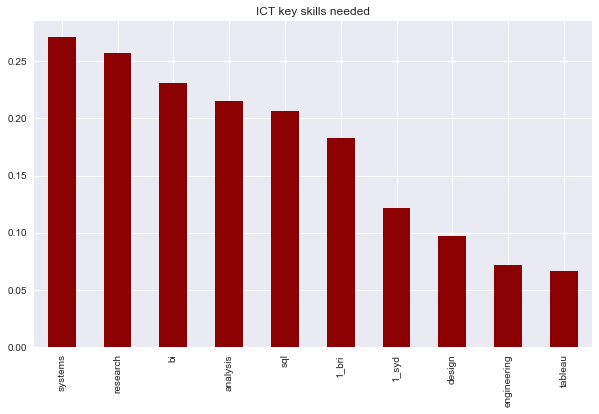

In [85]:
# Print and plot coefficients for ICT industry

print df_class_transpose['ICT'].nlargest(10)
df_class_transpose['ICT'].nlargest(10).sort_values(ascending=False).plot(kind='bar',
                                                                         x='feature',
                                                                         figsize=(10,6),
                                                                         color='darkred',
                                                                         title="ICT key skills needed")

1_syd           0.507995
data            0.278040
1_mel           0.260432
design          0.204383
analysis        0.184836
development     0.145342
systems         0.129642
intelligence    0.112721
sql             0.107812
research        0.106259
Name: Accounting, dtype: float64


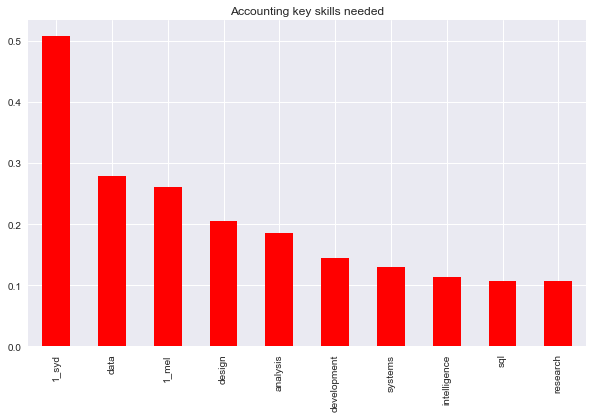

In [86]:
# Print and plot coefficients for Accounting industry

print df_class_transpose['Accounting'].nlargest(10)
df_class_transpose['Accounting'].nlargest(10).sort_values(ascending=False).plot(kind='bar',
                                                                         x='feature',
                                                                         figsize=(10,6),
                                                                         color='red',
                                                                         title="Accounting key skills needed")

1_syd           0.619306
1_mel           0.340273
intelligence    0.187918
team            0.184658
1_bri           0.153746
bi              0.148898
analysis        0.127563
systems         0.105156
research        0.104706
design          0.097142
Name: Banking_FS, dtype: float64


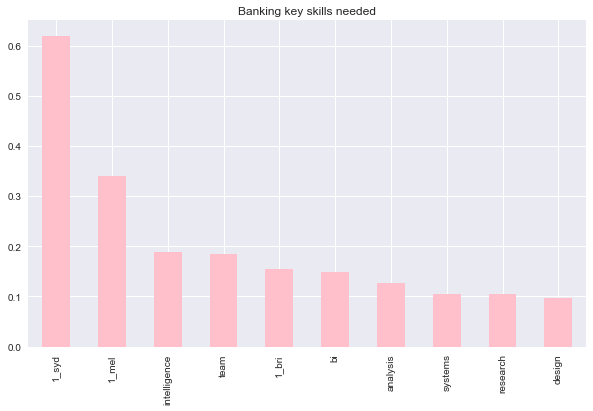

In [87]:
# Print and plot coefficients for Banking and Financial Services industry

print df_class_transpose['Banking_FS'].nlargest(10)
df_class_transpose['Banking_FS'].nlargest(10).sort_values(ascending=False).plot(kind='bar',
                                                                         x='feature',
                                                                         figsize=(10,6),
                                                                         color='pink',
                                                                         title="Banking key skills needed")

**Comment:** The logistic regression model has a R^2 of 0.63, which is reasonable. Excel is a dominant feature in classifying ICT and accounting, whereas Banking and Finance require Masters degrees (typical!)

### KNN Classification - *Industry*

I will now perform a Chi2 feature selection to observe the indepence of variables. I will then run a selection of predictors through a KNN classification model to see if this algorithm performs better than the logistic regression...

In [88]:
# Perform a CHI2 test

from sklearn.feature_selection import SelectKBest, chi2

# build the selector (we'll build one with each score type)
skb_chi2 = SelectKBest(chi2, k=5)

# train the selector on our data
skb_chi2.fit(ind_predictors, y_ind)

# examine results
kbest = pd.DataFrame([ind_predictors.columns, list(skb_chi2.scores_)], 
                     index=['feature','chi2 score']).T.sort_values('chi2 score', ascending=False)
kbest.head(10)

,feature,chi2 score
39,research,1500.68
45,science,687.671
7,data,527.105
30,learning,310.556
35,design,293.77
51,systems,187.517
47,analysis,186.229
32,visualization,182.4
33,engineering,147.957
31,statistics,124.343


In [89]:
# I will use the chi2 variables that are >100 in my KNN model

x_industry_chi2 = job_data_final[['research','science','design','engineering','sas','data','learning',
                                  'statistics','nosql','optimization','python','sql','modeling',
                                  'hadoop','systems']]

Xs_industry_chi2 = ss.fit_transform(x_industry_chi2)

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
# Gridsearch the optimal knn model using the chi2 industry predictors

knn_params = {
    'n_neighbors':[1,3,5,9,15,21],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']}

knn_gridsearch = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, verbose=1)  

knn_gridsearch.fit(Xs_industry_chi2, y_ind)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    2.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 9, 15, 21], 'metric': ['euclidean', 'manhattan'], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [92]:
# best cross validation score achieved
print "CV score:", knn_gridsearch.best_score_ 

# best knn parameters
print knn_gridsearch.best_params_ 

# calling best estimator
best_knn = knn_gridsearch.best_estimator_ 

# baseline accuracy of industry predictors and target
print "Baseline accuracy:", best_knn.score(Xs_industry_chi2, y_ind)

CV score: 0.563106796117
{'n_neighbors': 21, 'metric': 'euclidean', 'weights': 'distance'}
Baseline accuracy: 0.668284789644


#### Comment:
A slightly lower R^2 score than the Logisitc Regression (0.60 compared to 0.63) but it is still a reasonable output. Reducing the chi2 acceptance value and including greater variables would potentially increase this model performance...

## Part 02 - Initial Report Addendum - Data Science role and Industry Investigations

This report is an add-in for the report produced in part 1.  This section investigates two further questions:

**'What makes a good data scientist?'** &  **'What skills do certain industries look for?'**

### 'What makes a good data scientist?'**

This analysis aimed to assess which locations, industries and key skills are able to classify a 'data scientist'. My hypothesis was that key technical skills such as python, sql, will have be more important at classifying a data scientist role than location and industry... Decision tree and logistic regression classifications were used to evaluate model performance and feature importance.

**Results:**

*Decision Tree Classification:* A very high accuracy with this model was observed, a R^2  of > 0.9. Key skills also in line with common data science roles statistics, learning, python, scala. The most important non-skill feature is a job in the Insurance industry.

*Logisitic Regression:* Another very high accuracy with this model - R^2  of > 0.95. Key skills also in line with common data science roles; python (on top!), learning, predictive (analytics) and data. The most important non-skill feature is a job in the Science and Tech.

**Conclusion:**

With these very accurate models and many of the same skills and predictors placing high on the feature importance/predictive coefficients, we can confidently say that technical skills determine data science roles more than job industry, and definitely more than job location.

### 'What skills do certain industries look for?'**

In this investigation we analysed whether job locations and key skills could classify [data and research] jobs in certain *industries*. My hypothesis was that key technical skills such as python, sql, will have be more important at classifying a role in a certain industry rather than location... Classification algorithms - Logistic Regression and KNN - were investigated using the multinomial target variable of 10 specific industries (and 1 group of 'other').

**Results:**

*Logisitc Regression:*  The logistic regression model has a R^2 of 0.63, which is reasonable. When investigating the top three industries by job count we observe Excel as a dominant feature in classifying ICT and accounting, whereas Banking and Finance require Masters degrees. Only one location features in the top 10 importance for these three industries, which implies skills are influencing the regression classification more than location.

*Feature Selection/KNN:* The chi2 feature selection suggests research, science and design are the most independent variables. Selecting chi2 values of >100 and the KNN algorithm produced a slightly lower R^2 score at 0.6 than the Logisitc Regression but it is still a reasonable output. Reducing the chi2 acceptance value and including greater variables would potentially increase this model performance...

**Conclusion:**

Although these models are not as accurate as predicting industry as the 'data scienctist' models, we have still gained valuable insight to what factors mostly influence the classification of certain industries. It certainly seems skills are more determinant than location but the moderate accuracy indicates further model investigation is needed...

Potential Extensions of Investigation:
- Investigate other algorithms for higher model accuracy
- Review logreg coefficients in terms of the odds ratio
- Principle Component Analysis of predictor variables for all models
- Review other target variables to gather more data job insights

---

---

### -- BONUS --

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.

Note that this requires framing the salary problem as a classification problem detecting low vs. high salary positions.

**Note:** My boss was originally interested in the overall features (location, industry, job title/level) so we will use our overall feature / salary logistic regression model for this analysis.

In [93]:
# Input variables for overall salary classification model
X_overall.columns

Index([u'1_bri', u'1_mel', u'1_syd', u'2_ConsStrat', u'2_Education', u'2_Gov',
       u'2_HR', u'2_ICT', u'2_InsurSuper', u'2_MarkComms', u'2_Sales',
       u'2_SciTech', u'2_accounting', u'2_admin', u'2_architecture',
       u'2_construct', u'2_csd', u'2_customerS', u'2_engineering', u'2_health',
       u'2_legal', u'2_management', u'2_manufacturing', u'2_media',
       u'2_miningEnergy', u'2_property', u'2_retail', u'3_ba', u'3_bi',
       u'3_da', u'3_ds', u'3_ra', u'4_junior', u'4_manager', u'4_senior',
       u'4_spec'],
      dtype='object')

In [94]:
from sklearn.metrics import classification_report, confusion_matrix

# Setup the logistic regression model with hyperparameters for Part-01 Overall-Features logistic regression model.

lr = LogisticRegression(penalty='l2', C=0.79248289835391694, solver='liblinear')

# Reset y target to the high-v-low salary class:

y = job_data_final['salary_lvh']

# Investigate model accuracy:

scores = cross_val_score(lr, Xs_overall, y, cv=25)
print scores
print np.mean(scores)

# Fit model with predictors and salary target

lr.fit(Xs_overall, y)

[ 0.76923077  0.76923077  0.65384615  0.53846154  0.80769231  0.69230769
  0.65384615  0.73076923  0.84615385  0.79166667  0.70833333  0.54166667
  0.58333333  0.66666667  0.66666667  0.66666667  0.79166667  0.70833333
  0.625       0.66666667  0.625       0.58333333  0.70833333  0.45833333
  0.83333333]
0.683461538462


LogisticRegression(C=0.792482898354, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [95]:
# Calculate yhat:

yhat = lr.predict(Xs_overall)

In [96]:
# Sum all the true/false positive/negative combinations

tp_ = np.sum((y == 1) & (yhat == 1))
fp_ = np.sum((y == 0) & (yhat == 1))
tn_ = np.sum((y == 0) & (yhat == 0))
fn_ = np.sum((y == 1) & (yhat == 0))
print tp_, fp_, tn_, fn_

326 119 115 58


In [97]:
# convert the predicted and actual values to a confusion array

confusion_array = np.array(confusion_matrix(y, yhat, labels=[1,0]))

confusion = pd.DataFrame(confusion_array, index=['high_salary', 'low_salary'],
                         columns=['predicted_high','predicted_low'])
confusion

,predicted_high,predicted_low
high_salary,326,58
low_salary,119,115


In [98]:
# Extract fundamental classifier metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

print "accuracy:", accuracy_score(y,yhat)
print "false positive rate", float(fp_) / (tn_ + fp_)
print "specificity", float(tn_) / (tn_ + fp_)
print "------"
print classification_report(y, yhat)

accuracy: 0.71359223301
false positive rate 0.508547008547
specificity 0.491452991453
------
             precision    recall  f1-score   support

          0       0.66      0.49      0.57       234
          1       0.73      0.85      0.79       384

avg / total       0.71      0.71      0.70       618



**Comment:**
    
Using this model my boss would incorrectly tell clients they would get a high salary job, when in fact it is a low paying job, on 103 occasions (17% of the time). Both model accuracy and precision are fairly high .

Another key insight here is a moderate false positive rate of 50% - just what the boss doesn't want! To reduce the false positives, I will adjust what is deemed a 'high salary' and review the impact on the confusion matrix.

### Adjusted Logistic Regression Salary Model

Axes(0.125,0.125;0.775x0.755)


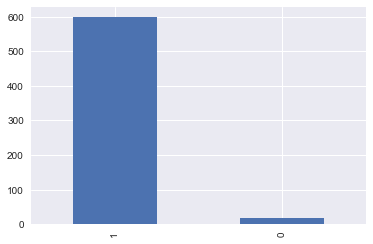

In [99]:
# I will now reset the level of the high vs low salary. Many levels were tested and the following example 
# shows one of the most optimal splits needed to reduce the false positives.

# Create a new Y value for and adjusted high vs low salary:
job_data_final['salary_lvh_adjusted'] = 0

# Set >170000 as "high-paying" job
job_data_final.loc[job_data_final.salary_final > 60000, 'salary_lvh_adjusted'] = 1

print job_data_final['salary_lvh_adjusted'].value_counts().plot(kind='bar') # More high paid jobs than lower paid jobs!

In [100]:
# Set new classification target:

y_adjusted = job_data_final['salary_lvh_adjusted']

# Setup the logistic regression model with hyperparameters for Part-01 Overall Features logistic regression model.

lr_adjusted = LogisticRegression(penalty='l2', C=0.79248289835391694, solver='liblinear')

# Investigate model accuracy:

scores = cross_val_score(lr_adjusted, Xs_overall, y_adjusted, cv=25)
print scores
print np.mean(scores)

# Fit model with predictors and salary target

lr_adjusted.fit(Xs_overall, y_adjusted)

/Users/indraja/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 19 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=25.
  % (min_groups, self.n_splits)), Warning)


[ 0.92  0.96  0.96  0.96  0.96  0.96  0.96  0.96  0.96  0.96  0.96  0.96
  0.96  0.96  0.96  0.96  0.96  0.96  0.96  1.    1.    1.    1.    1.    1.  ]
0.968


LogisticRegression(C=0.792482898354, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [101]:
# Calculate yhat:

yhat_adjusted = lr.predict(Xs_overall)

# Sum all the true/false positives/negatives combinations

tp_adj = np.sum((y_adjusted == 1) & (yhat_adjusted == 1))
fp_adj = np.sum((y_adjusted == 0) & (yhat_adjusted == 1))
tn_adj = np.sum((y_adjusted == 0) & (yhat_adjusted == 0))
fn_adj = np.sum((y_adjusted == 1) & (yhat_adjusted == 0))

# convert the predicted and actual values to a confusion array

confusion_array = np.array(confusion_matrix(y_adjusted, yhat_adjusted, labels=[1,0]))

confusion = pd.DataFrame(confusion_array, index=['high_salary', 'low_salary'],
                         columns=['predicted_high','predicted_low'])
confusion

,predicted_high,predicted_low
high_salary,432,167
low_salary,13,6


In [102]:
# Extract fundamental classifier metrics

print "accuracy:", accuracy_score(y_adjusted,yhat_adjusted) # accuracy = (tp + tn) / total_population
print "false positive rate", float(fp_adj) / (tn_adj + fp_adj)
print "specificity", float(tn_adj) / (tn_adj + fp_adj)
print "------"
print classification_report(y_adjusted, yhat_adjusted)
# Precision = True Positives / (True Positives + False Positives)

accuracy: 0.708737864078
false positive rate 0.684210526316
specificity 0.315789473684
------
             precision    recall  f1-score   support

          0       0.03      0.32      0.06        19
          1       0.97      0.72      0.83       599

avg / total       0.94      0.71      0.80       618



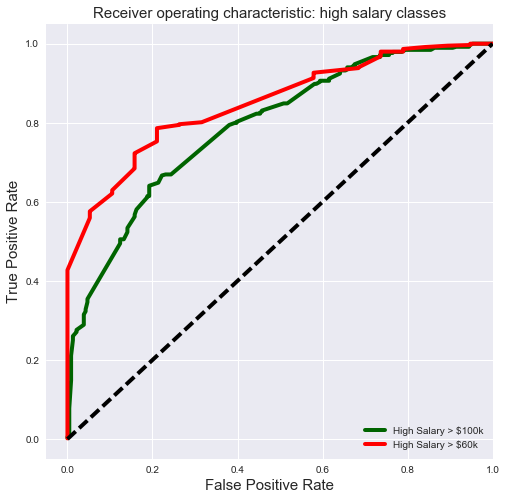

In [103]:
# Plot the ROC curve:

from sklearn.metrics import roc_curve, auc

yhat_pp = lr.predict_proba(Xs_overall)
yhat_adjusted_pp = lr_adjusted.predict_proba(Xs_overall)

# original roc/auc calculation
fpr, tpr, _ = roc_curve(y, yhat_pp[:,1])
roc_auc = auc(fpr, tpr)

# adjusted roc/auc calculation
fpr_adjusted, tpr_adjusted, _ = roc_curve(y_adjusted, yhat_adjusted_pp[:,1])
roc_auc_adjusted = auc(fpr_adjusted, tpr_adjusted)

plt.figure(figsize=[8,8])

plt.plot(fpr, tpr, label='High Salary > $100k' % roc_auc, linewidth=4,color='darkgreen')
plt.plot(fpr_adjusted, tpr_adjusted, label='High Salary > $60k' % roc_auc_adjusted, 
         linewidth=4, color='red')

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Receiver operating characteristic: high salary classes', fontsize=15)
plt.legend(loc="lower right")
plt.show()

### Result of Analysis:

To ensure our logistic regression model does not predict high salaries when in fact they are low (i.e.: false positives), the salary class split has been decreased. Optimal levels to decrease the false positives close to 0 were found to be a class split of c.$60,000. This effect reduces the false positives to 11. The confidence of the  model also improves to a R^2 value of 0.97. The accuracy goes down slightly but the precision is significantly improved. The  F1 score (the harmonic mean of the precision and recall metrics) is improved slightly.

Overall this model meets the requirements of the boss. However when using this model, we have to keep in mind the following tradeoffs:
- The split in salary is heavily skewed to the high salary class. This results in a less informative classification as we know that typically most jobs will be greater than $60,000.
- The false-positive rate is higher for the adjusted model but the sample size is significantly lower (16 total with only 5 true negatives) - again, a tradeoff to account for the few negatives that are produced by the model.
- Finally, we can see from the two plotted ROC curves that they are similar in predictability at the upper end of the curve, although the decreased salary class appears to have a greater overall area. This means that it has a higher ratio of true positives to false positives.

*Note:* An extension of this report to produce a confusion matrix for all previous models would be very beneficial.

## End